# Hotel reservaitions cancelling prediction project

by yakir mermelstein and shoham kraus


we will use the hotel_train.csv dataset and the hotel_test.csv dataset to create and evaluate the model

# imoprt relevant libreris

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

from statistics import mean
from imblearn.over_sampling import BorderlineSMOTE

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from torch.utils.data import DataLoader
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
import torch.optim.lr_scheduler as lr_scheduler
%matplotlib inline
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

# Importing the data

In [ ]:
# from google.colab import drive
#drive.mount('/content/drive')
train_df = pd.read_csv("./hotels_train.csv")
test_df = pd.read_csv("./hotels_test.csv")

# Data information

In [ ]:
# presenting the number of rows and column in the data set
print("Shape: ", train_df.shape)
# presenting the 5 first rows of the data set
#in order to visually see the data we are working on
train_df.head()

Shape:  (27213, 18)


,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [ ]:
#present the data columns ,their non_null values and their type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [ ]:
# basic statistics of each column in the dataset
train_df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


## missing values





In [ ]:
train_df.isnull().sum()

ID                        0
weekend_nights            0
week_nights               0
room_type                 0
board_type             8168
n_adults                  0
n_less_12                 0
n_more_12                 0
booked_tour               0
n_requests                0
lead_time               419
purchase_type          4847
n_p_cacellation           0
n_p_not_cacellation       0
repeated                  0
price                  3405
date                      0
is_canceled               0
dtype: int64

In [ ]:
train_df['room_type'] = train_df['room_type'].str.extract('(\d+)', expand = True).astype(str)
board_type_mapping = {
    'not selected': '0',
    'breakfast': '1',
    'half board': '2',
    'full board': '3'
}
train_df['board_type'] = train_df['board_type'].map(board_type_mapping)
purchase_type_mapping = {
    'Offline': '1',
    'Online': '2',
    'Corporate': '3',
    'Aviation': '4',
    'Complementary': '5'
}
train_df['purchase_type'] = train_df['purchase_type'].map(purchase_type_mapping)
train_df['room_type'] = train_df['room_type']
train_df['board_type'] = train_df['board_type']
train_df['purchase_type'] = train_df['purchase_type']

In [ ]:
target = pd.DataFrame(train_df['is_canceled'])
data = train_df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

#Data statistics

Count all the data that are 2018/2/29 (this date doesn't exist)Filtering the DataFrame: It filters the train_df DataFrame to exclude rows where the value in the date column is '2018-2-29'.

Date Validation: Since '2018-2-29' is not a valid date (February 29 does not exist in 2018 because 2018 is not a leap year), this line effectively ensures that any incorrect or malformed date entries of '2018-2-29' are removed from the DataFrame.

In [ ]:
train_df = train_df[train_df['date']!= '2018-2-29']

##        showing the columns names in a list:

In [ ]:
numeric_col = train_df.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price', 'is_canceled'],
      dtype='object')

##      separating the dataset  into numeric and numinal data:

In [ ]:
numeric_data = data[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)

histogram for each column showing it distribition, mean and median
(other info like std quntiles and freq are mentioned in the describe func shown above)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

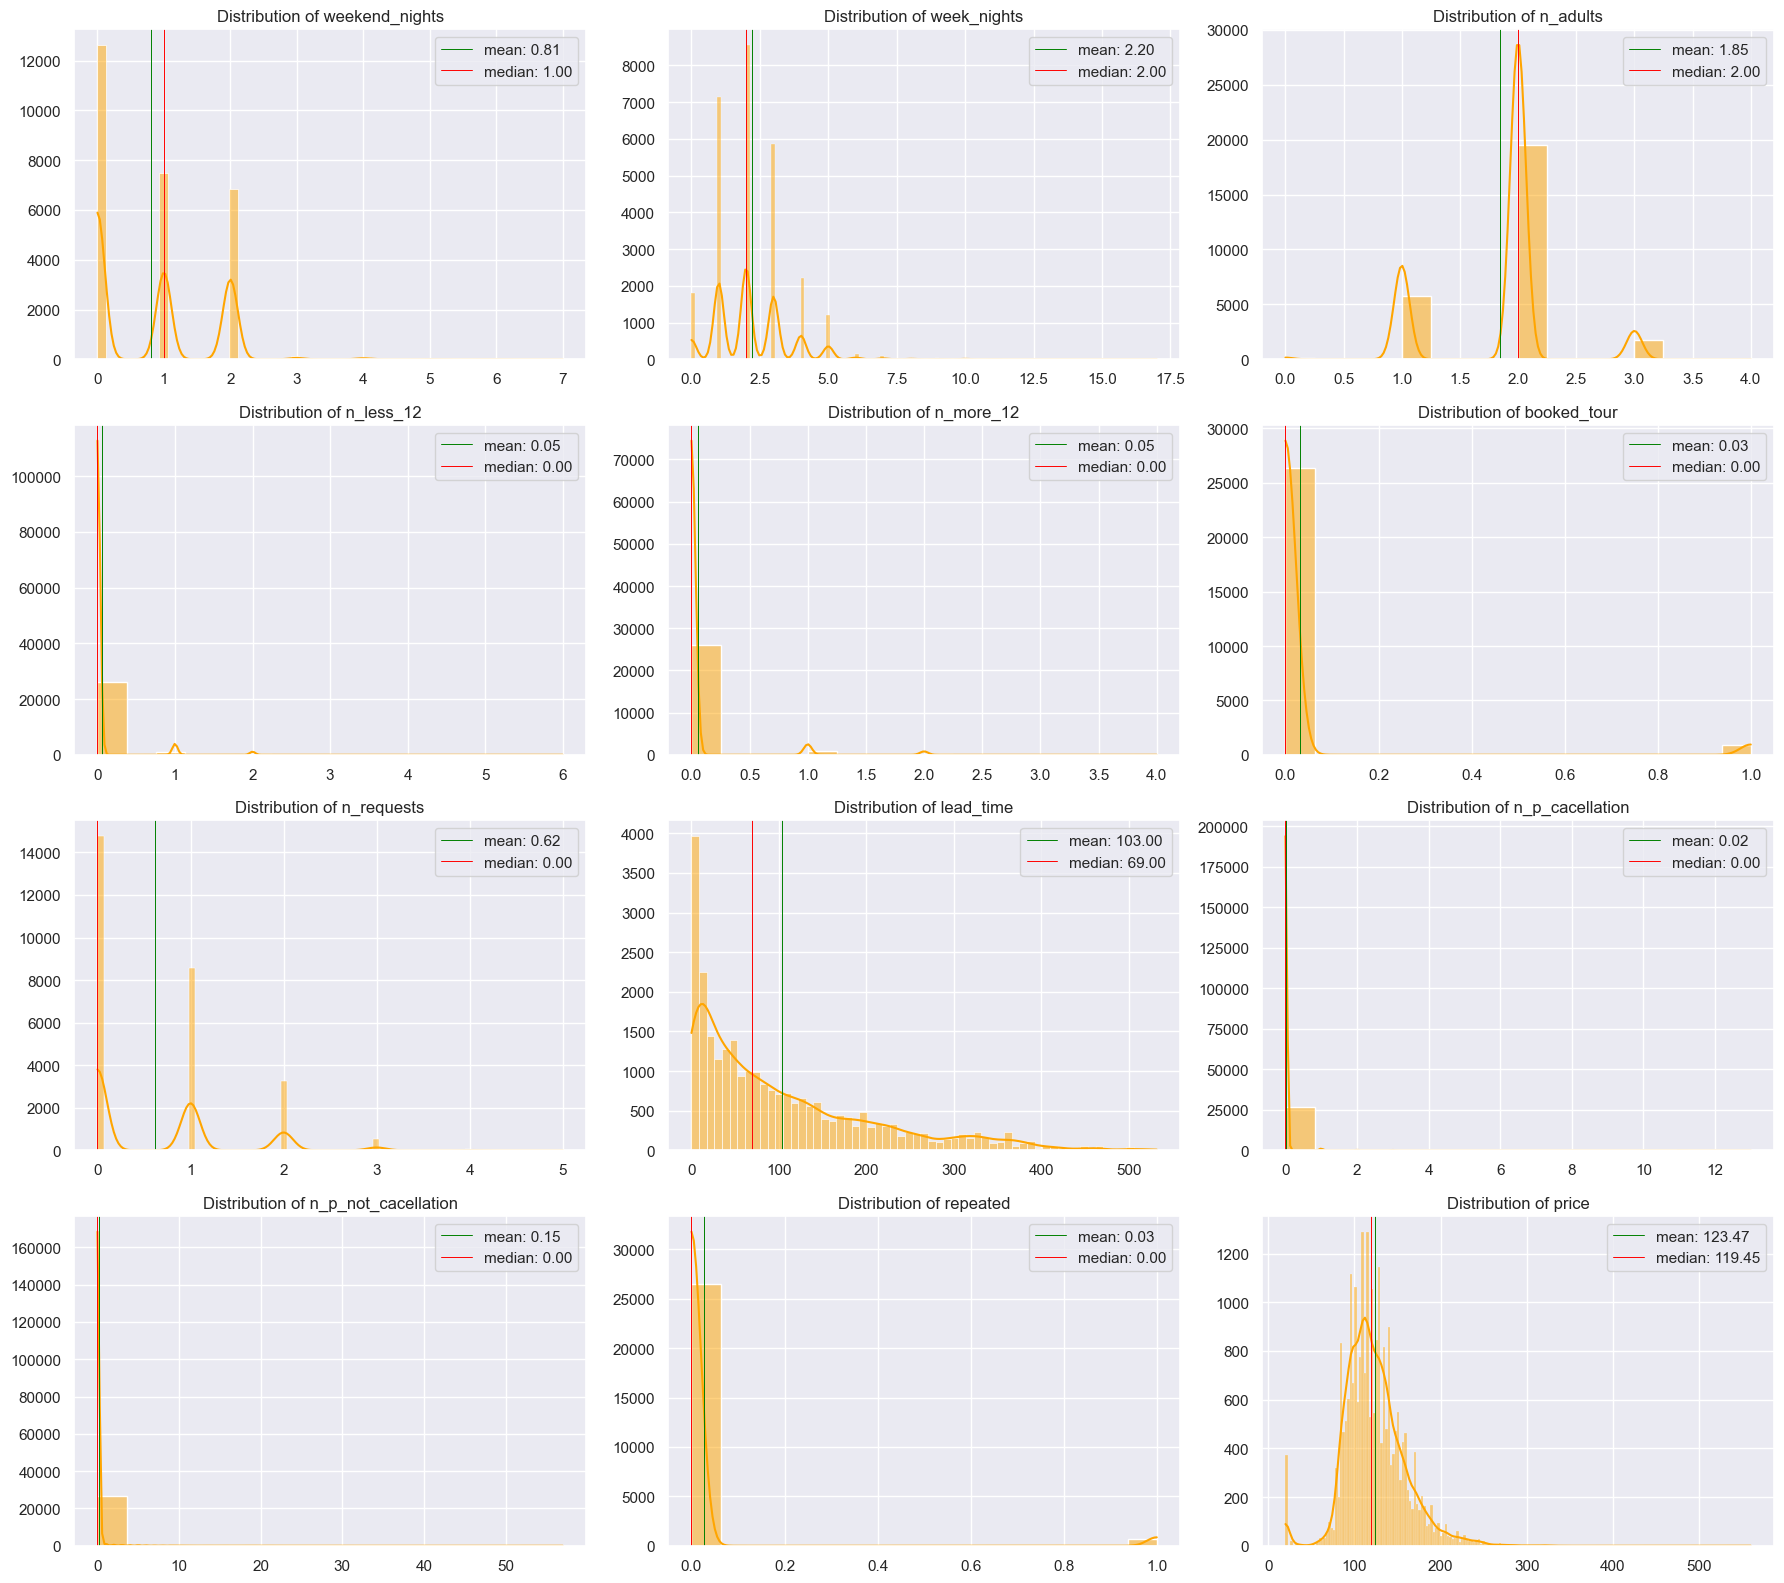

In [ ]:
# List of columns to visualize
columns_to_plot = [
    'weekend_nights', 'week_nights', 'n_adults', 'n_less_12',
    'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
    'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price'
]

# Create a grid of plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    sns.histplot(train_df[column], kde=True, ax=axes[row, col], color='orange')
    mean_val = train_df[column].mean()
    median_val = train_df[column].median()
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].axvline(mean_val, color='green', linestyle='-', linewidth=0.7, label=f'mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='red', linestyle='-', linewidth=0.7, label=f'median: {median_val:.2f}')
    axes[row, col].legend()
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

plt.tight_layout()
plt.show()

##Histogram

די מיותר בגלל הקוד לפני, אפשר למחוק לדעתי

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

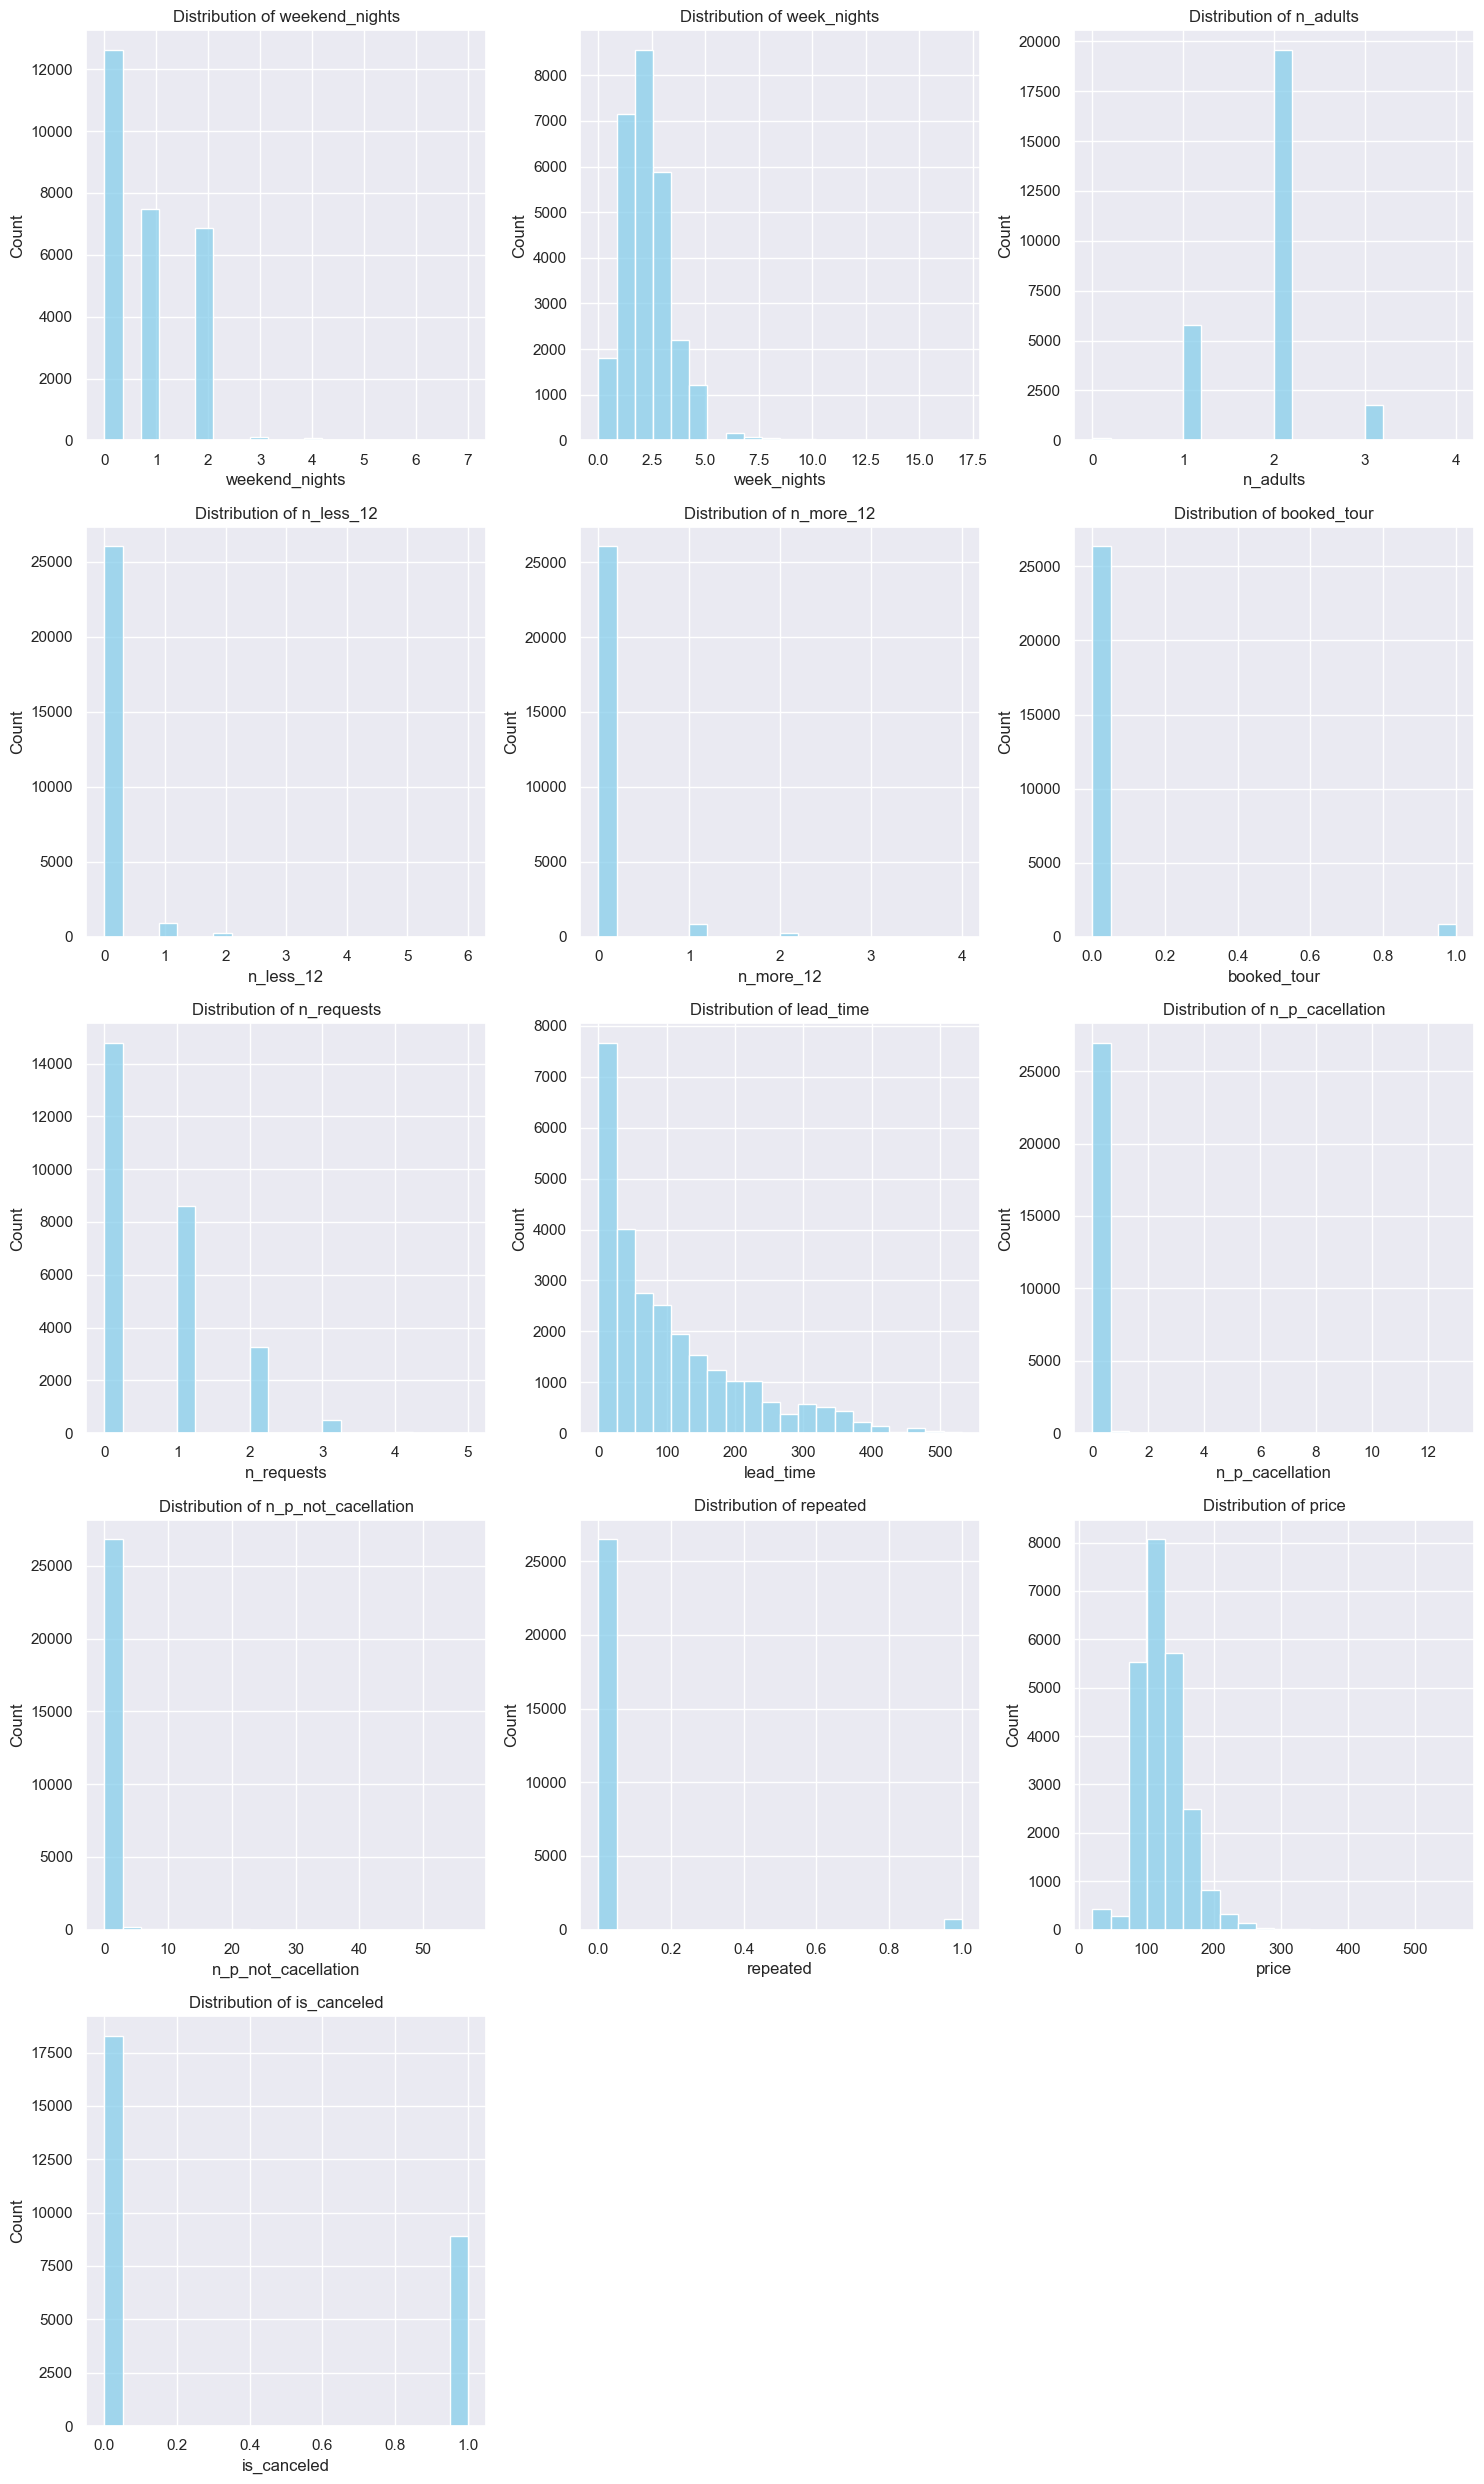

In [ ]:
n_cols = 3
n_rows = (len(numeric_col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##Skewness

Skewness of the numerical data:

In [ ]:
# Calculate skewness of numerical columns
numerical_columns = ['lead_time', 'price', 'week_nights', 'n_adults', 'weekend_nights', 'n_requests']
skewness = train_df[numerical_columns].skew()
print("Skewness before transformation:\n", skewness)

Skewness before transformation:
 lead_time         1.290752
price             0.682450
week_nights       1.543132
n_adults         -0.324842
weekend_nights    0.719113
n_requests        1.143249
dtype: float64


# Correlation
לראות שמבצעים את כל הקורצליות
עם גרפים עם הסברים

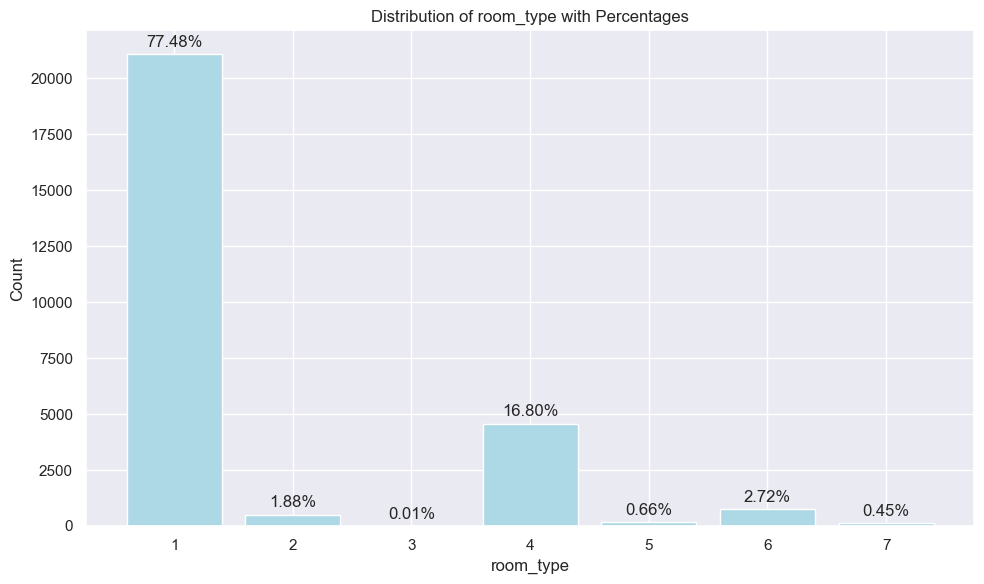

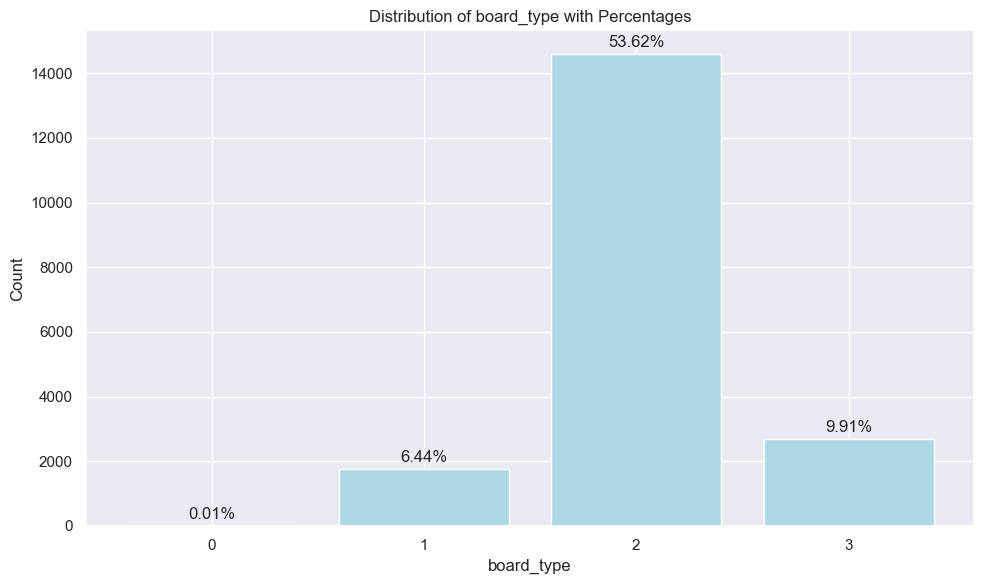

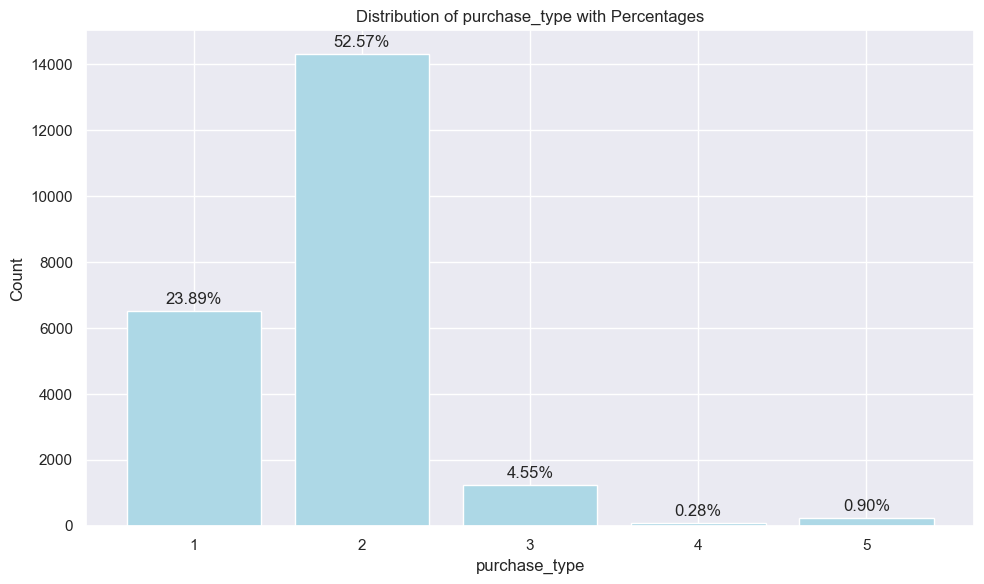

In [ ]:
cat_col = ['room_type', 'board_type', 'purchase_type']
total_rows = len(data)

for col in cat_col:
    non_null_count = data[col].count()  # Count of non-null values
    null_count = total_rows - non_null_count  # Calculate the number of null values
    fig, ax = plt.subplots(figsize=(10, 6))
    value_counts = data[col].value_counts().sort_index()
    bars = ax.bar(value_counts.index, value_counts.values, color='lightblue')

    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_rows) * 100
        ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

    ax.set_title(f'Distribution of {col} with Percentages')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()
    print()


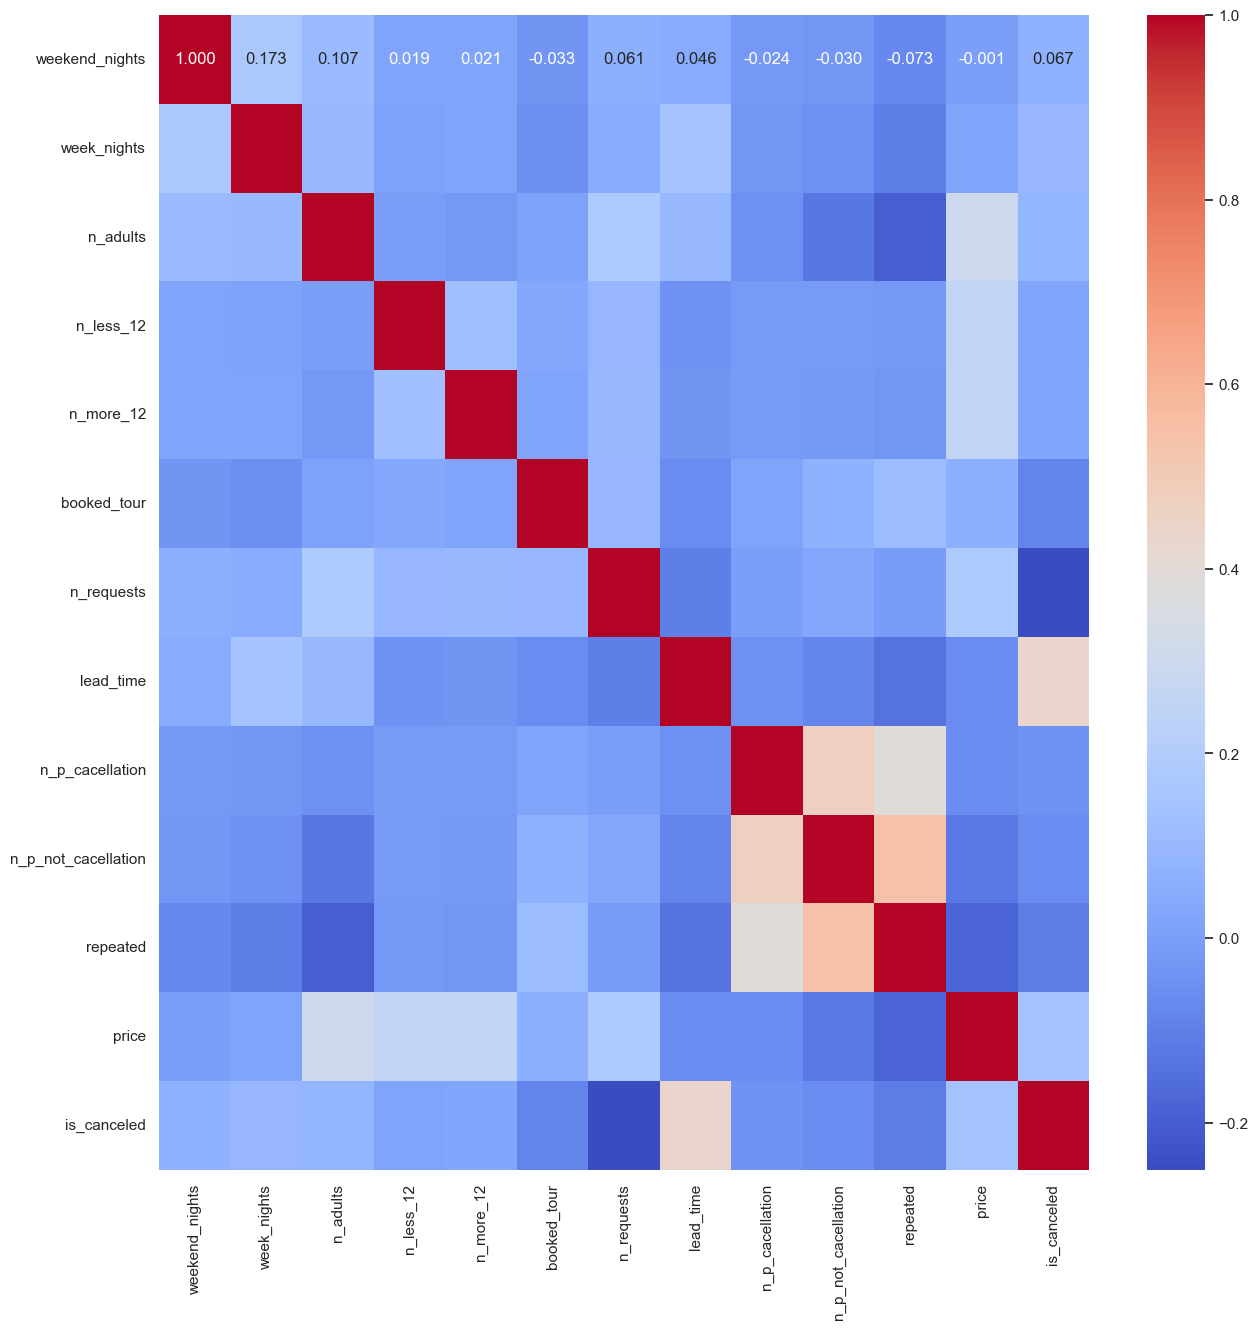

In [ ]:
# Set the figure size
sns.set(rc={'figure.figsize': (15, 15)})

# Create a heatmap with the 'coolwarm' colormap
sns.heatmap(train_df[numeric_col].corr(), annot=True, fmt=".3f", cmap='coolwarm')

# Display the plot
plt.show()

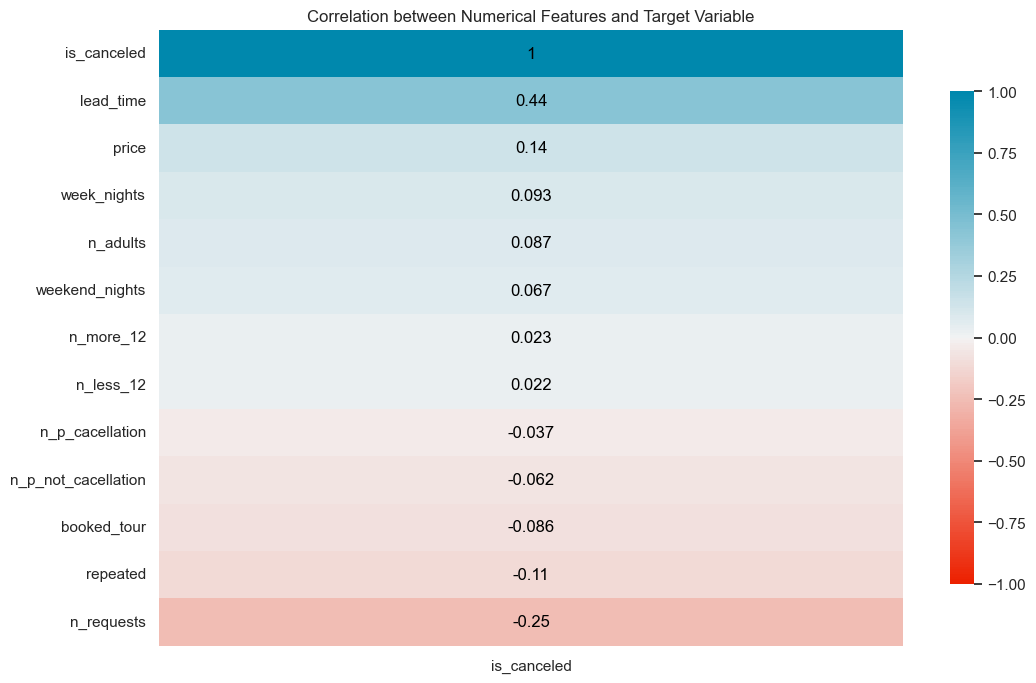

In [ ]:
# Assuming train_df is already defined
numeric_data = train_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Extract correlation with the target variable
correlation_with_target = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)

# Create a diverging palette with the center at zero
palette = sns.diverging_palette(20, 220, s=150 , n=200, center="light")

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_target, annot=True, cmap=palette, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, annot_kws={"color": "black"})
plt.title('Correlation between Numerical Features and Target Variable')

plt.show()

## Correlation between price and cancellation

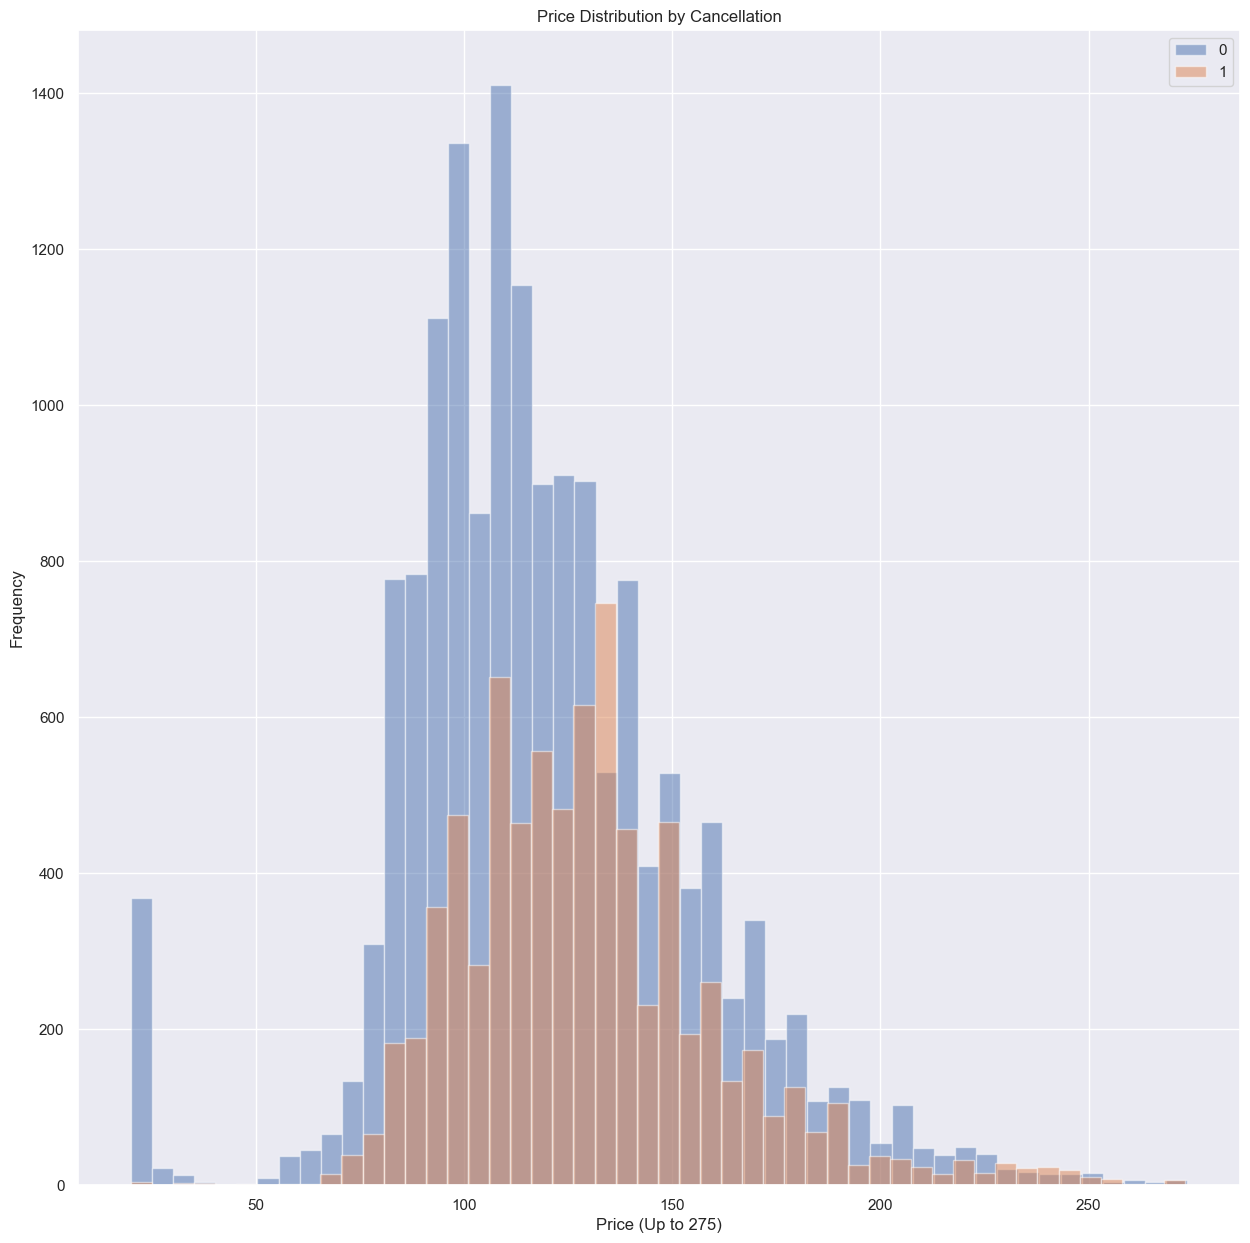

In [ ]:
train_df[train_df['price'] < 275].groupby('is_canceled')['price'].plot(kind='hist', bins=50, alpha=.5, legend=True)
plt.xlabel('Price (Up to 275)')
plt.ylabel('Frequency')
plt.title('Price Distribution by Cancellation')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9296\1917062884.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = train_df.groupby([bins, 'is_canceled']).size().unstack(fill_value=0)


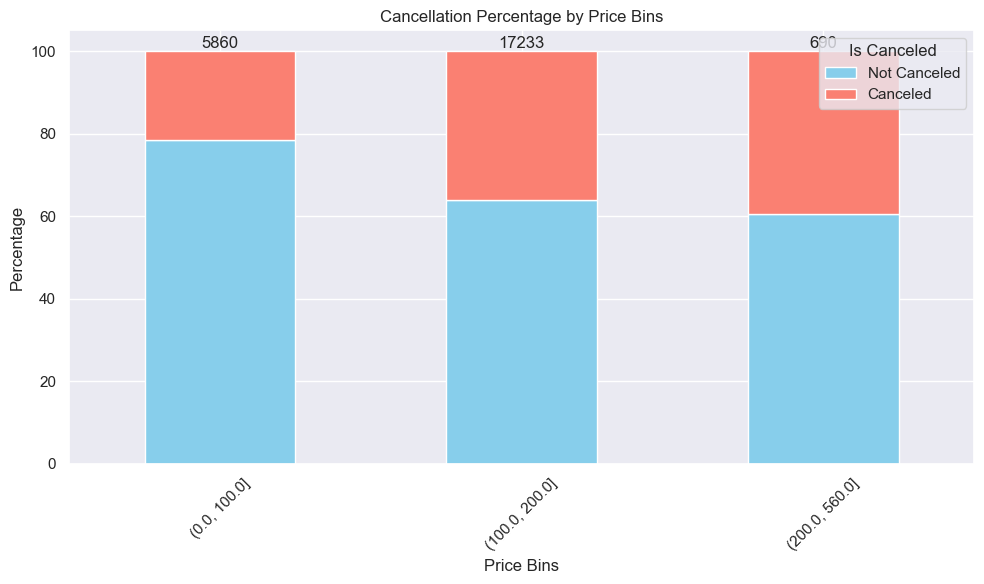

In [ ]:
bin_edges = [0, 100, 200, train_df['price'].max()]

# Bin the prices into the specified intervals
bins = pd.cut(train_df['price'], bins=bin_edges)

# Create a DataFrame to hold the counts of cancellations and non-cancellations in each bin
bin_counts = train_df.groupby([bins, 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations in each bin
bin_percentages = bin_counts.div(bin_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
ax = bin_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Price Bins')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Price Bins')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each bin on top of the bars
for i in range(len(bin_counts)):
    total = bin_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation between purchase type and cancellation

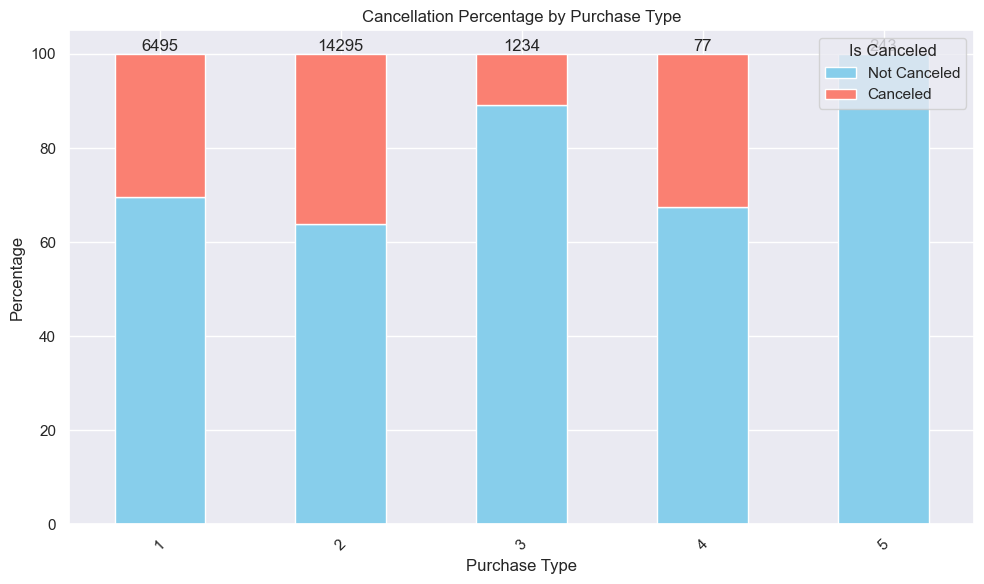

In [ ]:
# Group by purchase_type and is_canceled and count occurrences
purchase_type_counts = train_df.groupby(['purchase_type', 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations for each purchase type
purchase_type_percentages = purchase_type_counts.div(purchase_type_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
ax = purchase_type_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Purchase Type')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Purchase Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each purchase type on top of the bars
for i in range(len(purchase_type_counts)):
    total = purchase_type_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation between room type and cancellation

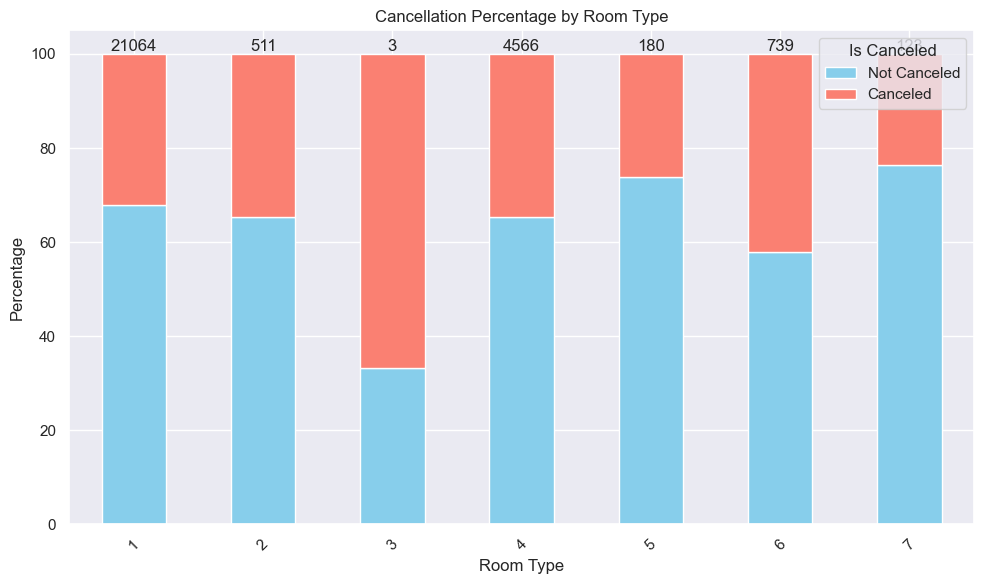

In [ ]:
# Group by room_type and is_canceled and count occurrences
room_type_counts = train_df.groupby(['room_type', 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations for each room type
room_type_percentages = room_type_counts.div(room_type_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
ax = room_type_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Room Type')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Room Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each room type on top of the bars
for i in range(len(room_type_counts)):
    total = room_type_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation between board type and cancellation

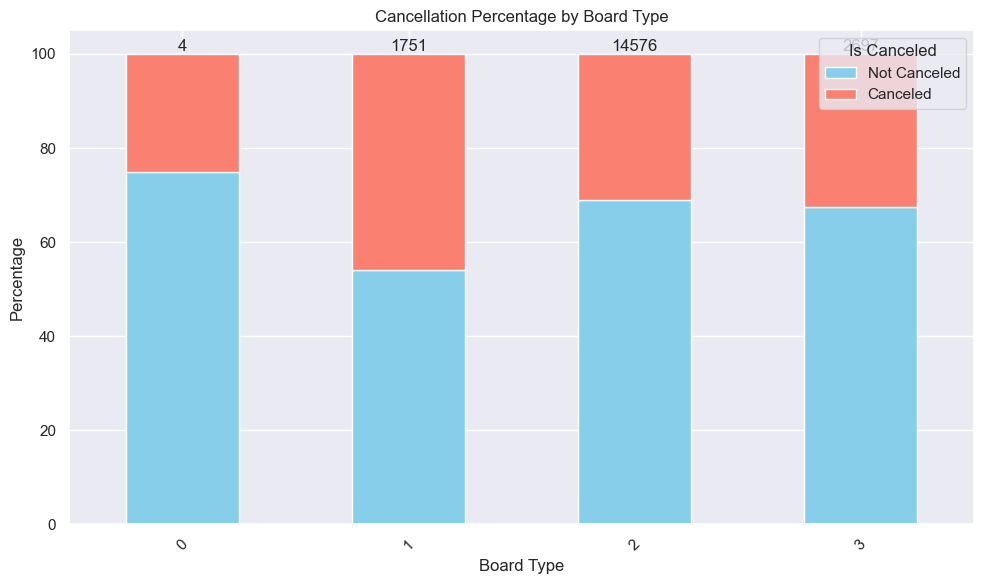

In [ ]:
# Group by board_type and is_canceled and count occurrences
board_type_counts = train_df.groupby(['board_type', 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations for each board type
board_type_percentages = board_type_counts.div(board_type_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
ax = board_type_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Board Type')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Board Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each board type on top of the bars
for i in range(len(board_type_counts)):
    total = board_type_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation between lead time and cancellation
להוסיף מקרא לגרף

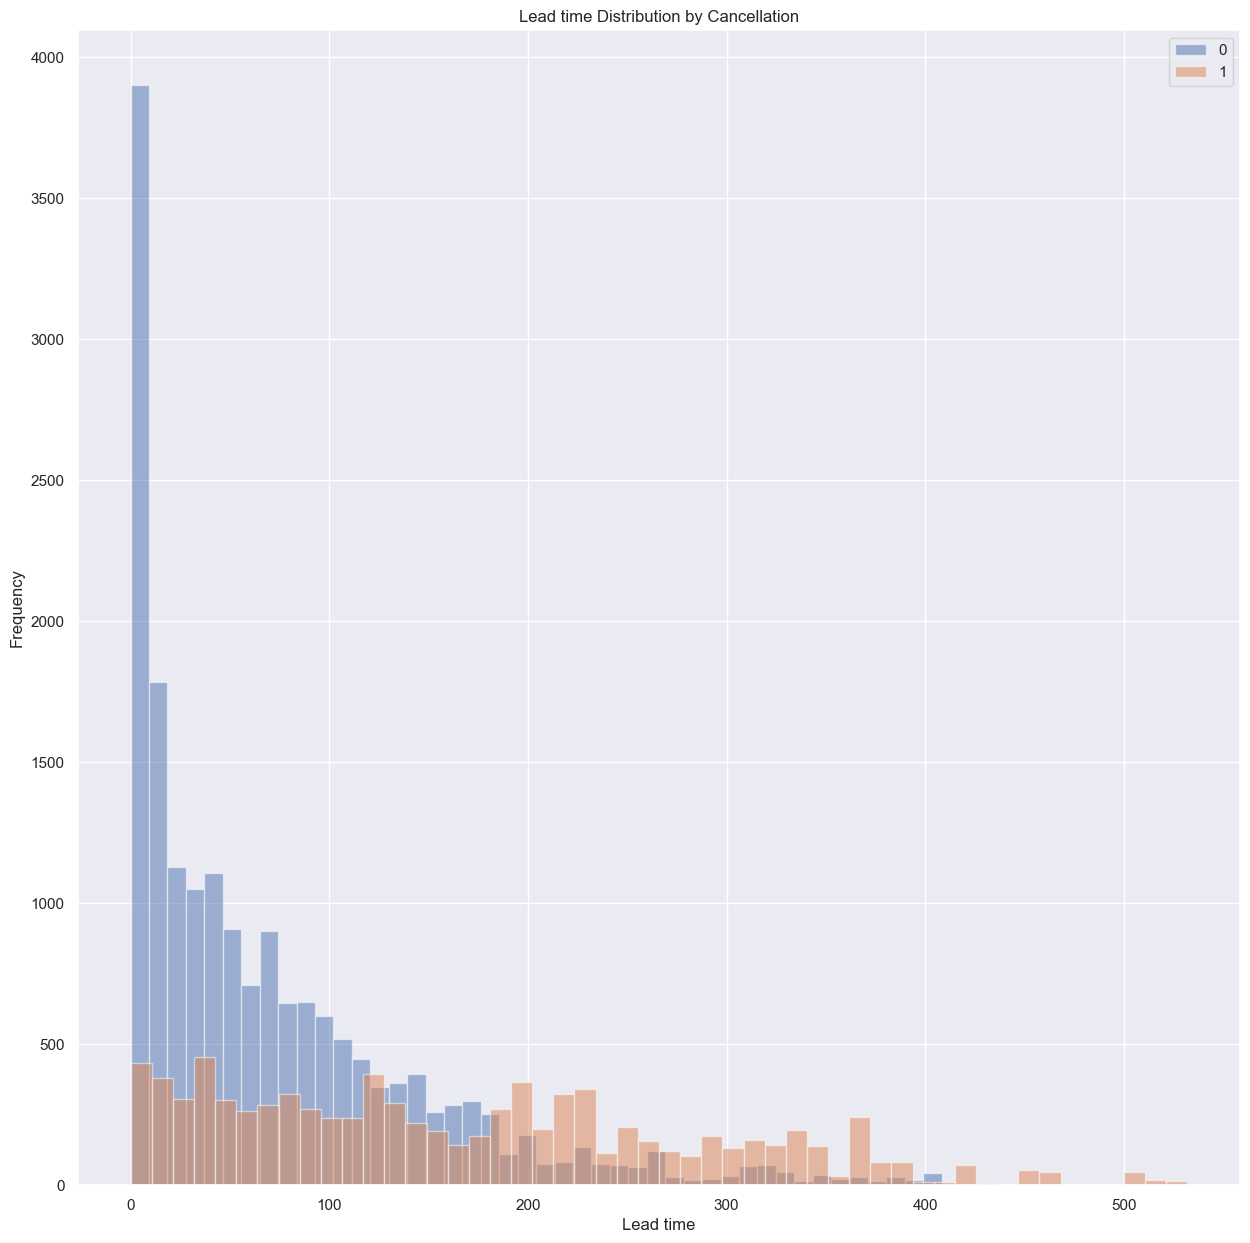

In [ ]:
train_df.groupby('is_canceled')['lead_time'].plot(kind='hist', bins=50, alpha=.5, legend=True)
plt.xlabel('Lead time')
plt.ylabel('Frequency')
plt.title('Lead time Distribution by Cancellation')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9296\1777735256.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = train_df.groupby([bins, 'is_canceled']).size().unstack(fill_value=0)


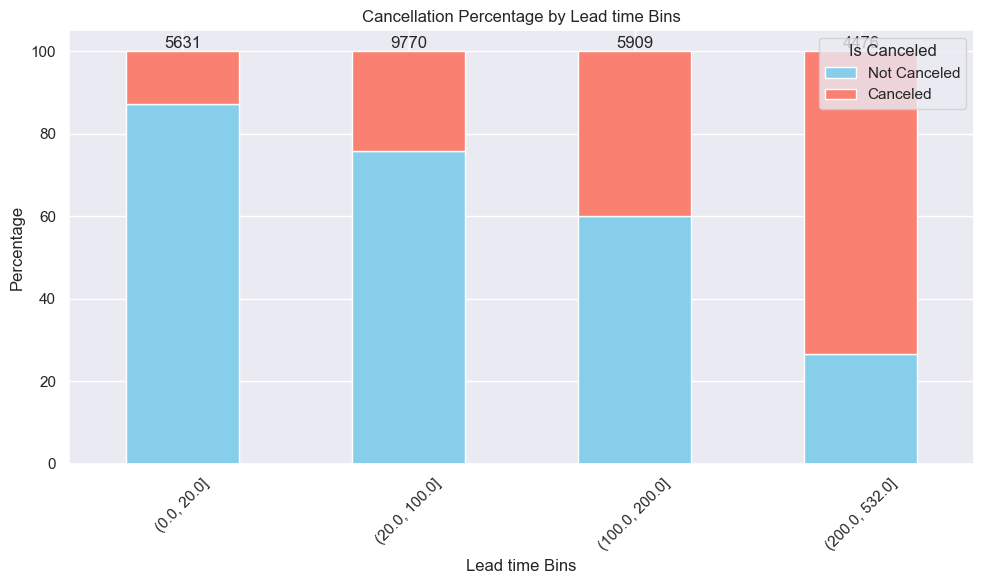

In [ ]:
bin_edges = [0, 20, 100, 200, train_df['lead_time'].max()]

# Bin the lead time into the specified intervals
bins = pd.cut(train_df['lead_time'], bins=bin_edges)

# Create a DataFrame to hold the counts of cancellations and non-cancellations in each bin
bin_counts = train_df.groupby([bins, 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations in each bin
bin_percentages = bin_counts.div(bin_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
ax = bin_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Lead time Bins')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Lead time Bins')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each bin on top of the bars
for i in range(len(bin_counts)):
    total = bin_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation between number of adults, number of kids and cancellation
טבלה נוספת בהשוואה לגיל הילדים

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9296\1297544605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['n_kids'] = train_df['n_more_12'] + train_df['n_less_12']


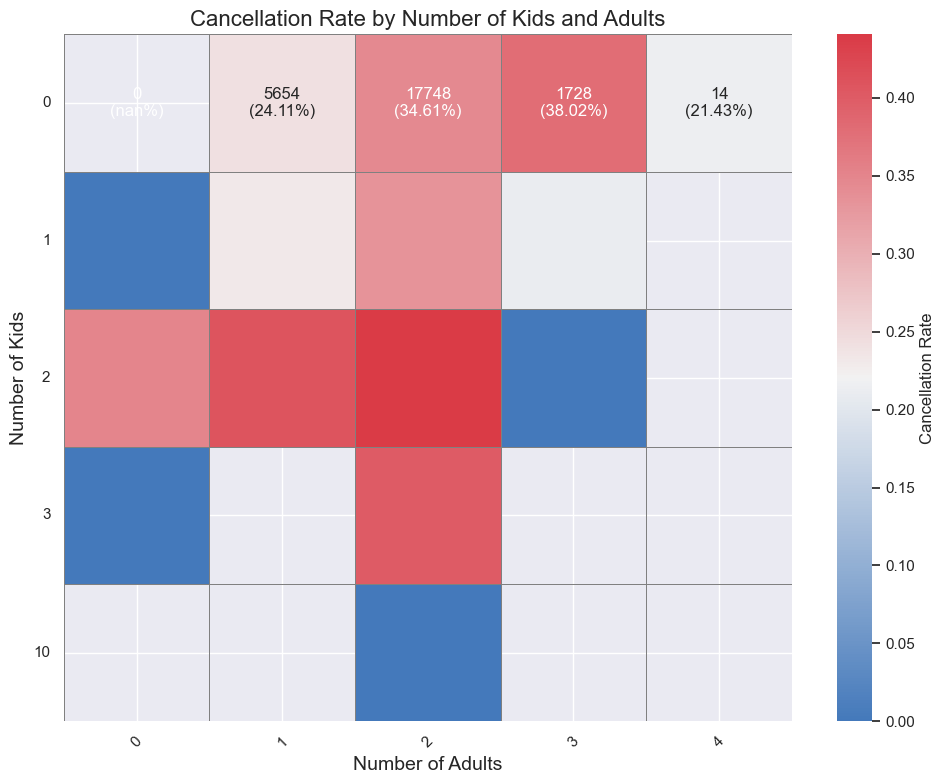

In [ ]:
train_df['n_kids'] = train_df['n_more_12'] + train_df['n_less_12']

# Calculate the percentage of cancellations for each combination of n_kids and n_adults
cancellation_rate = train_df.groupby(['n_kids', 'n_adults'])['is_canceled'].mean().unstack()

# Calculate the count of bookings for each combination of n_kids and n_adults
booking_counts = train_df.groupby(['n_kids', 'n_adults']).size().unstack()

# Fill NaN values in booking_counts with 0 before converting to int
booking_counts = booking_counts.fillna(0).astype(int)

# Create a DataFrame that combines counts and cancellation rates for annotation
annot_df = booking_counts.astype(str) + "\n(" + (cancellation_rate * 100).round(2).astype(str) + "%)"

# Plot the heatmap with counts and cancellation rates
plt.figure(figsize=(10, 8))
sns.heatmap(cancellation_rate, annot=annot_df, fmt="", cmap = sns.diverging_palette(250, 10, as_cmap=True), cbar_kws={'label': 'Cancellation Rate'}, linewidths=.5, linecolor='gray')

plt.xlabel('Number of Adults', fontsize=14)
plt.ylabel('Number of Kids', fontsize=14)
plt.title('Cancellation Rate by Number of Kids and Adults', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

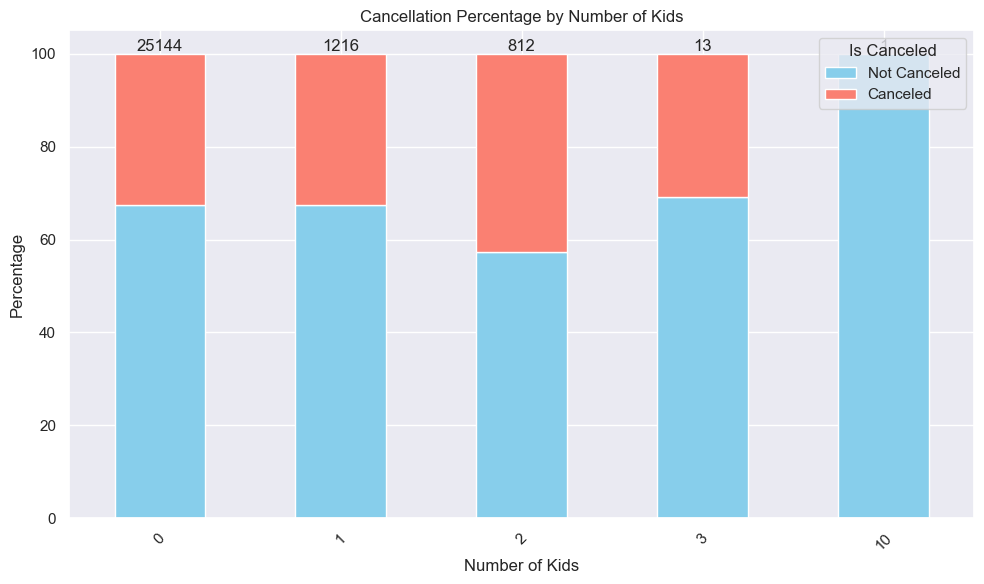

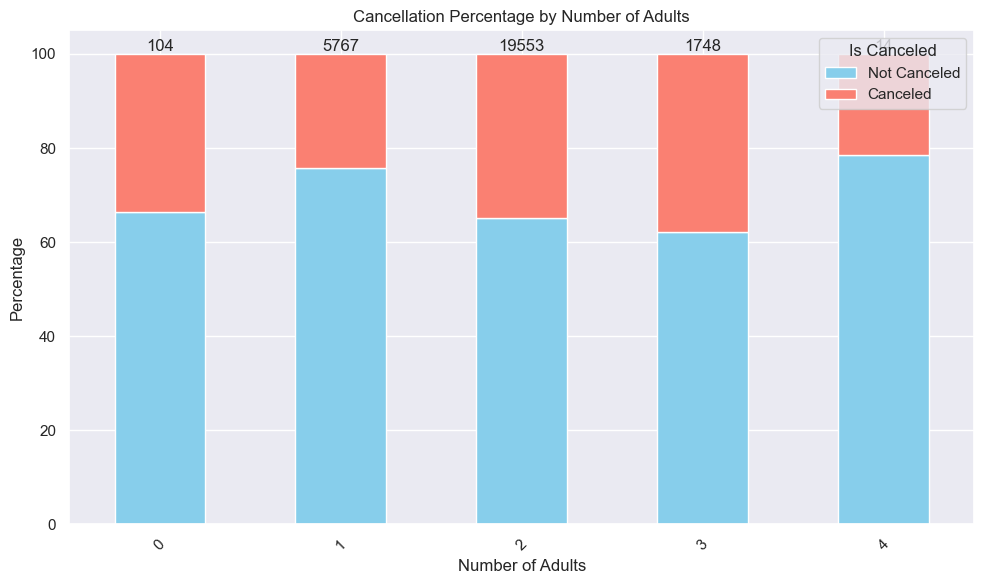

In [ ]:
# Group by n_kids and is_canceled and count occurrences
kids_counts = train_df.groupby(['n_kids', 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations for each n_kids
kids_percentages = kids_counts.div(kids_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart for n_kids
ax = kids_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Number of Kids')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Number of Kids')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each n_kids on top of the bars
for i in range(len(kids_counts)):
    total = kids_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by n_adults and is_canceled and count occurrences
adults_counts = train_df.groupby(['n_adults', 'is_canceled']).size().unstack(fill_value=0)

# Calculate the percentage of cancellations and non-cancellations for each n_adults
adults_percentages = adults_counts.div(adults_counts.sum(axis=1), axis=0) * 100

# Plot the bar chart for n_adults
ax = adults_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Number of Adults')
plt.ylabel('Percentage')
plt.title('Cancellation Percentage by Number of Adults')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Add the count of items in each n_adults on top of the bars
for i in range(len(adults_counts)):
    total = adults_counts.iloc[i].sum()
    ax.text(i, 100, f'{total}', ha='center', va='bottom')

# Improve visualization aesthetics
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
train_df = train_df.drop(['n_kids'], axis=1)

# Preprocessing

## Missing values

Prepearing the data to the classification task by taking care of:

Missing values

Outliers

Inconsistencies

Normalization

Discretizatio

In [ ]:
overall_board_mode = train_df['board_type'].mode()[0]
overall_purchase_mode = train_df['purchase_type'].mode()[0]

# Fill missing values in 'board_type' with the mode for each 'purchase_type'
train_df['board_type'] = train_df.groupby('purchase_type', group_keys=False)['board_type'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else '0'))

# Fill missing values in 'purchase_type' with the mode for each 'board_type'
train_df['purchase_type'] = train_df.groupby('board_type', group_keys=False)['purchase_type'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else '1'))

# Fill missing values in 'price' with the mean for each 'n_adults'
train_df['price'] = train_df.groupby('n_adults', group_keys=False)['price'].apply(lambda x: x.fillna(x.mean()))

# Fill missing values in 'lead_time' with the median for all data
train_df['lead_time'] = train_df['lead_time'].fillna(train_df['lead_time'].mean())

# Fill the data for line without board_type and purchase_type
train_df['board_type'] = train_df['board_type'].fillna(overall_board_mode)
train_df['purchase_type'] = train_df['purchase_type'].fillna(overall_purchase_mode)

## Remove irrelevant data

The ID doesn't implie anything about the data

In [ ]:
train_df = train_df.drop(['ID'], axis=1)

Our hypothesis is that the specific day and month of the date are important, but the year is not.







In [ ]:
# Step 1: Convert to datetime format
train_df['date'] = pd.to_datetime(train_df['date'], format='%m/%d/%Y')

# Step 2: Change the format to 'm-d'
train_df['month-day'] = train_df['date'].dt.strftime('%m-%d')

# Step 3: Convert to day of the year
train_df['day_of_year'] = train_df['date'].dt.dayofyear

train_df = train_df.drop(['date','month-day'], axis=1)

## Outliers

Check if high prices are outliers

In [ ]:
train_df[train_df['price'] > 300]

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,day_of_year
183,1,2,4,2,2,0,0,0,0,69.0,2,0,0,0,334.10,0,364
2306,1,2,6,1,2,2,0,0,0,14.0,2,0,0,0,326.00,1,259
4092,0,3,6,1,2,0,2,0,1,52.0,2,0,0,0,369.63,0,363
5439,0,1,6,1,2,0,2,0,1,27.0,2,0,0,0,317.00,0,217
5683,1,2,1,1,2,0,0,0,0,208.0,1,0,0,0,320.00,1,206
8417,2,3,1,1,2,0,0,0,1,207.0,1,0,0,0,320.00,1,210
9412,0,1,1,2,2,0,0,0,0,42.0,1,0,0,0,560.00,1,84
11801,2,1,7,2,3,1,0,0,0,29.0,2,0,0,0,305.17,1,141
15017,1,1,7,2,2,0,2,0,4,22.0,2,0,0,0,320.00,0,295
16006,2,1,7,2,3,0,1,0,0,29.0,2,0,0,0,305.17,1,141


for room types 4,6 and 7 (which are probably fancy rooms) it's possible price, all others invitations were cancelled so it possible that they cancelled because of the high price, so no outliers.

## Data Normalization

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numeric columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler to the numeric columns
scaler.fit(train_df[numeric_cols])

# Transform the numeric columns
train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])


In [ ]:
train_df['room_type'] = train_df['room_type'].astype('int')
train_df['board_type'] = train_df['board_type'].astype('int')
train_df['purchase_type'] = train_df['purchase_type'].astype('int')

In [ ]:
train_df.to_csv('data_after_preprocessing.csv')

PermissionError: [Errno 13] Permission denied: 'data_after_preprocessing.csv'

# Balancing the data

In [ ]:
X = train_df.drop('is_canceled', axis=1)  # Features
y = train_df['is_canceled']  # Target

smote = BorderlineSMOTE() # Initialize the BorderlineSMOTE resampler
X_resampled, y_resampled = smote.fit_resample(X, y) # Apply Borderline SMOTE to oversample the minority class

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['is_canceled'] = y_resampled

df_resampled_shuffled = df_resampled.sample(frac=1, random_state=42)

In [ ]:
Y_resampled = df_resampled_shuffled['is_canceled']
X_resampled = df_resampled_shuffled.drop('is_canceled', axis=1)

In [ ]:
labels = Y_resampled
training_data = X_resampled

In [ ]:
print((labels == 1).sum())
print((labels == 0).sum())

18274
18274


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(training_data, labels , test_size = 0.2)

# Models

## Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train, y_train)
base_pred = dtc.predict(x_test)

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [10, 20, 60, 70, 80, 90, 100, None]
max_leaf_nodes = [2, 5, 20, 30, 40, 50, None]
min_samples_split = [0.1, 0.5, 1.0, 2, 3, 4, 5]
min_samples_leaf = [1, 2, 3, 4, 5]

random_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=5, n_jobs = -1, scoring='f1', random_state = 42)
dtc_random.fit(x_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 60, 70, 80, 90,
                                                      100, None],
                                        'max_leaf_nodes': [2, 5, 20, 30, 40, 50,
                                                           None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [0.1, 0.5, 1.0, 2,
                                                              3, 4, 5]},
                   random_state=42, scoring='f1', verbose=5)

In [ ]:
# Saving the models
torch.save(dtc, 'base_dtc')
torch.save(dtc_random, 'opt_dtc')

In [ ]:
dtc_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_depth': 20,
 'criterion': 'gini'}

In [ ]:
pred = dtc_random.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For optimal decision tree:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1- fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For optimal decision tree:
the accuracy is:  0.8590971272229823
the precision is:  0.8637241379310345
the recall is:  0.8538314698663758
the 1- fp_rate is:  0.8643974746088389
the f_measure is:  0.8587493143170598
the average is: 0.8599599047892582


In [ ]:
pred = dtc.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For base decision tree:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1- fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For base decision tree:
the accuracy is:  0.8637482900136799
the precision is:  0.8616301110208503
the recall is:  0.8677392964275975
the 1- fp_rate is:  0.8597309909415317
the f_measure is:  0.8646739130434783
the average is: 0.8635045202894276


## Adaboost

In [ ]:
adaboost = AdaBoostClassifier(learning_rate = 0.5, n_estimators=50, random_state=42)
adaboost.fit(x_train, y_train)
pred = adaboost.predict(x_test)

In [ ]:
learning_rate = [0.1*(i+1) for i in range(15)]
n_estimators = [20 * (i + 20) for i in range(10)]

random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators}

adaboost_random = RandomizedSearchCV(estimator = adaboost, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = 5, random_state = 42)
adaboost_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.8, n_estimators=460;, score=0.841 total time=   8.4s
[CV 2/5] END learning_rate=0.8, n_estimators=460;, score=0.840 total time=   8.0s
[CV 3/5] END learning_rate=0.8, n_estimators=460;, score=0.845 total time=   8.5s
[CV 4/5] END learning_rate=0.8, n_estimators=460;, score=0.842 total time=   8.4s
[CV 5/5] END learning_rate=0.8, n_estimators=460;, score=0.836 total time=   8.4s
[CV 1/5] END learning_rate=0.2, n_estimators=560;, score=0.826 total time=  10.2s
[CV 2/5] END learning_rate=0.2, n_estimators=560;, score=0.825 total time=  10.4s
[CV 3/5] END learning_rate=0.2, n_estimators=560;, score=0.827 total time=  10.6s
[CV 4/5] END learning_rate=0.2, n_estimators=560;, score=0.827 total time=  10.0s
[CV 5/5] END learning_rate=0.2, n_estimators=560;, score=0.824 total time=  10.4s
[CV 1/5] END learning_rate=1.2000000000000002, n_estimators=560;, score=0.848 total time=  10.2s
[CV 2/5] END learnin

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(learning_rate=0.5,
                                                random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0, 1.1,
                                                          1.2000000000000002,
                                                          1.3,
                                                          1.4000000000000001,
                                                          1.5],
                                        'n_estimators': [400, 420, 440, 460,
                                                         480, 500, 520, 540,
                                                         560, 580]},
                   random_state=42, verbose=5)

In [ ]:
torch.save(adaboost, 'base_adaboost')
torch.save(adaboost_random, 'opt_adaboost')

In [ ]:
adaboost_random.best_params_

{'n_estimators': 560, 'learning_rate': 1.5}

In [ ]:
pred = adaboost_random.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For optimal adaboost:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For optimal adaboost:
the accuracy is:  0.8508891928864569
the precision is:  0.8600167644593462
the recall is:  0.8393782383419689
the 1 - fp_rate is:  0.8624759813340653
the f_measure is:  0.8495721777532431
the average is: 0.852466470955016


In [ ]:
pred = adaboost.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For base adaboost:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For base adaboost:
the accuracy is:  0.7972640218878249
the precision is:  0.7932885906040269
the recall is:  0.8058358331060813
the 1 - fp_rate is:  0.7886357397749107
the f_measure is:  0.7995129870129871
the average is: 0.796907434477166


## Random forest

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [ ]:
random_parameters = {'criterion' : ['gini', 'entropy'],
                     'n_estimators' : [50, 60, 70, 80, 90 ,100],
                     'max_depth' : [4 ,5, 6, 7, 8, None],
                     'min_samples_leaf': [0.1, 0.5, 1.0, 2, 5, 10, 15],
                     'min_samples_split' : [0.1, 0.5, 1.0 , 2, 5, 10, 15],
                     'max_features' : ['auto', 'log2']}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_parameters, n_iter = 400, cv = 10, verbose = 5, random_state = 42)
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.774 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.770 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.782 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.775 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.4s
[CV 6/10] END criterion=entropy, max

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100;, score=0.500 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_dept

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=60;, score=0.772 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=60;, score=0.774 total time=   0.5s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=60;, score=0.785 total time=   0.5s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=60;, score=0.779 total time=   0.5s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=60;, score=0.777 total time=   0.4s
[CV 6/10] END criterion=entropy, max_depth=8, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.827 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.830 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.837 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.828 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.828 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.840 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.840 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.822 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.830 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.840 total time=   1.3s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=8, max_fea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.743 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.744 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.748 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.738 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.749 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.750 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.746 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.745 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.746 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.747 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=80;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=80;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=80;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=80;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=80;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=entropy, max

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.846 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.845 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.851 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.846 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.844 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.850 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.854 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.836 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.842 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.858 total time=   1.9s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.5, n_estimators=80;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.5, n_estimators=80;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.5, n_estimators=80;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.5, n_estimators=80;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.5, n_estimators=80;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=l

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.756 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.760 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.769 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.765 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.756 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.756 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.769 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.751 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.763 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.761 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=6, max_features=log2, min_sam

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=4, max_features

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.499 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.851 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.844 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.850 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.849 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.841 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.852 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.851 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.840 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.843 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80;, score=0.855 total time=   1.5s
[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=70;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=70;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=70;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=70;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=70;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_lea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.809 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.808 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.814 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.808 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.814 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.824 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.801 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.812 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.807 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.799 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.813 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.798 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.802 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.797 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.804 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.803 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.766 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.767 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.769 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.766 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.769 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.768 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.770 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.753 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.769 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=90;, score=0.770 total time=   0.8s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.753 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.713 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.736 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=8, max_features=log2, min_sample

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=5, n_estimators=100;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.818 total time=   1.0s
[CV 2/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.817 total time=   1.0s
[CV 3/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.824 total time=   1.0s
[CV 4/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.815 total time=   1.0s
[CV 5/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.819 total time=   1.1s
[CV 6/10] END criterion=gini, max_depth=6, max_features=log2, min_samples

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.793 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.799 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.794 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.799 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.813 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.810 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.793 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.798 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=90;, score=0.807 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.807 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.800 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.807 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.800 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.802 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.808 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.816 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.795 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.802 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=100;, score=0.811 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.896 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.898 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.898 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.893 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.897 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.898 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.898 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.892 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.898 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=0.896 total time=   1.5s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.774 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.770 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.782 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.775 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=4, max_fea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.832 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.824 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.841 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.833 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.834 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.840 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.843 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.828 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.831 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.841 total time=   1.1s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=50;, score=0.740 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=50;, score=0.737 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=50;, score=0.748 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=50;, score=0.720 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=50;, score=0.743 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=5, max_feature

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.881 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.877 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.881 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.873 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.879 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.882 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.886 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.870 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.879 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.879 total time=   1.7s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=60;, score=0.768 total time=   0.4s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=60;, score=0.774 total time=   0.4s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=60;, score=0.778 total time=   0.4s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=60;, score=0.772 total time=   0.4s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=60;, score=0.767 total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.821 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.818 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.824 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.821 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.819 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.831 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.832 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.824 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.829 total time=   1.1s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.766 total time=   0.7s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.767 total time=   0.7s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.769 total time=   0.8s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.766 total time=   0.7s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.769 total time=   0.7s
[CV 6/10] END criterion=entropy, max_depth=8, max_feature

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.803 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.798 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.815 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.798 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.800 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.813 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.816 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.797 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.805 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.804 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.5s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.717 total time=   0.4s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.751 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.738 total time=   0.5s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.740 total time=   0.5s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2,

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.499 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.499 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=60;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=60;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=60;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=60;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=60;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=4, max_featur

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.845 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.837 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.843 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.840 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.838 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.848 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.845 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.835 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.838 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.848 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.829 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.827 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.834 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.827 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.822 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.840 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.835 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.825 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.822 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.833 total time=   1.7s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=60;, score=0.835 total time=   1.0s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=60;, score=0.826 total time=   1.0s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=60;, score=0.837 total time=   1.1s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=60;, score=0.831 total time=   0.9s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=60;, score=0.828 total time=   0.9s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.737 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.743 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.766 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.737 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.750 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.752 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.757 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.735 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.739 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.748 total time=   0.4s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.768 total time=   0.4s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.774 total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.778 total time=   0.4s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.772 total time=   0.4s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.4s
[CV 6/10] END criterion=gini, max_depth=8, max_features=log2, min_s

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.748 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.759 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.768 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.753 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.756 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.753 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.765 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.749 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.757 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.756 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.841 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.839 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.846 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.841 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.838 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.847 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.850 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.835 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.840 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.847 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.812 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.811 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.819 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.805 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.807 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.819 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.823 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.804 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.808 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90;, score=0.811 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.501 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.501 total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.827 total time=   1.2s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.831 total time=   1.3s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.836 total time=   1.2s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.826 total time=   1.4s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.748 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.759 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.768 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.753 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.756 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.753 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.765 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.749 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.757 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.756 total time=   0.8s
[CV 1/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=60;, score=0.805 total time=   0.7s
[CV 2/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=60;, score=0.800 total time=   0.7s
[CV 3/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=60;, score=0.817 total time=   0.7s
[CV 4/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=60;, score=0.808 total time=   0.7s
[CV 5/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=60;, score=0.812 total time=   0.8s
[CV 6/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_lea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.801 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.795 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.802 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.795 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.799 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.809 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.807 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.797 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.804 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=50;, score=0.807 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=7, max_feat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.753 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.713 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.736 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.751 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.742 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.736 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.733 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.825 total time=   1.9s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.830 total time=   1.7s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.833 total time=   1.9s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.825 total time=   1.9s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.832 total time=   1.7s
[CV 6/10] END criterion=entropy, max_depth=7, max_features=log2, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.843 total time=   1.7s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.833 total time=   1.7s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.844 total time=   1.9s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.836 total time=   1.8s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.835 total time=   1.7s
[CV 6/10] END criterion=entropy, max_depth=8, max_feat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.749 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.763 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.728 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.745 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.744 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.745 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.746 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=70;, score=0.752 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.840 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.837 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.844 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.836 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.839 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.844 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.847 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.832 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.836 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.848 total time=   1.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=50;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=50;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=50;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=50;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=50;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_le

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.814 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.816 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.822 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.824 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.816 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.831 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.831 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.812 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70;, score=0.828 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=100;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.748 total time=   0.7s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.759 total time=   0.9s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.768 total time=   0.7s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.753 total time=   0.7s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.756 total time=   0.7s
[CV 6/10] END criterion=gini, max_depth=7, max_features

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.744 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.753 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.749 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.728 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.743 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.750 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.755 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.744 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.749 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=60;, score=0.757 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=No

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=70;, score=0.499 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=6, max_fe

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.726 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.729 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.739 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.732 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.734 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.729 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.750 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.720 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=log2, min_samples

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.761 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.763 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.773 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.768 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.762 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.764 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.771 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.752 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.770 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=80;, score=0.766 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.832 total time=   0.9s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.828 total time=   0.9s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.840 total time=   1.0s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.838 total time=   1.1s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.833 total time=   1.0s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.737 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.743 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.766 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.737 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.750 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.752 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.757 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.735 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.739 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=80;, score=0.748 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.768 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.774 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.778 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.772 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.761 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.750 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.764 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.769 total time=   0.4s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.814 total time=   1.8s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.810 total time=   1.6s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.828 total time=   1.6s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.819 total time=   1.7s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.817 total time=   1.5s
[CV 6/10] END criterion=entropy, max_depth=6, max_features=

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.844 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.833 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.843 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.836 total time=   2.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.833 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.847 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.843 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.831 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.837 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.843 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.895 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.897 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.902 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.894 total time=   2.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.896 total time=   2.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.899 total time=   2.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.899 total time=   2.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.892 total time=   2.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.896 total time=   2.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=80;, score=0.896 total time=   2.6s
[CV 1/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.820 total time=   1.0s
[CV 2/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.817 total time=   1.0s
[CV 3/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.825 total time=   1.0s
[CV 4/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.817 total time=   1.2s
[CV 5/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=0.817 total time=   1.0s
[CV 6/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.807 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.799 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.813 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.798 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.802 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.815 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.797 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.804 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.803 total time=   1.1s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.744 total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.757 total time=   0.5s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.736 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.751 total time=   0.5s
[CV 6/10] END criterion=entropy, max_depth=5, max_features=l

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.736 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.754 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.759 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.742 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.749 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.759 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.762 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.746 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.748 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.747 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=6, m

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.774 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.770 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.782 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.775 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.779 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.778 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.780 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.759 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.774 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=50;, score=0.773 total time=   0.4s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=50;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=50;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=50;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=50;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=entrop

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.805 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.792 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.810 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.800 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.802 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.806 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.814 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.794 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.801 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.808 total time=   0.9s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=70;, score=0.749 total time=   0.4s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=70;, score=0.763 total time=   0.4s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=70;, score=0.728 total time=   0.3s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_sam

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.823 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.820 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.826 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.820 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.818 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.832 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.838 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.813 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.819 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.828 total time=   1.2s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.499 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.815 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.812 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.828 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.823 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.815 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.829 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.824 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.808 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.814 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=90;, score=0.818 total time=   1.4s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_sample

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.746 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.756 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.752 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.743 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.768 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.760 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.767 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.750 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.758 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.756 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=90;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=90;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=90;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=90;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=90;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=None, max_f

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.844 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.833 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.843 total time=   2.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.836 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.833 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.847 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.843 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.831 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.837 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.843 total time=   2.1s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, n_estimators=100;, score=0.799 total time=   1.4s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, n_estimators=100;, score=0.795 total time=   1.4s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, n_estimators=100;, score=0.803 total time=   1.3s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, n_estimators=100;, score=0.797 total time=   1.4s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=0.1, n_estimators=100;, score=0.801 total time=   1.5s
[CV 6/10] END criterion=entropy, max_depth=6, m

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.778 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.771 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.773 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.773 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.775 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.754 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=80;, score=0.773 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.800 total time=   0.8s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.797 total time=   0.8s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.807 total time=   0.9s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.799 total time=   0.8s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.801 total time=   0.9s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=lo

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 5/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=5, max_features=log2, min

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.773 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.779 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.774 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.776 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.749 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.771 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.805 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.803 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.808 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.802 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.809 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.818 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.795 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.804 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.811 total time=   1.2s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=60;, score=0.827 total time=   0.9s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=60;, score=0.830 total time=   1.1s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=60;, score=0.834 total time=   1.1s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=60;, score=0.828 total time=   1.0s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=60;, score=0.825 total time=   1.0s
[CV 6/10] END criterion=entropy, max_depth=7, max_features=log2,

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.6s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.800 total time=   0.6s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.804 total time=   0.6s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.6s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.796 total time=   0.6s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=log

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.809 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.803 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.817 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.811 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.804 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.814 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.826 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.804 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.810 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.813 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.740 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.737 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.748 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.720 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.743 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.733 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.749 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.744 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.744 total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.757 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.736 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.751 total time=   0.5s
[CV 6/10] END criterion=entropy, max_depth=7, max_feat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=0.806 total time=   1.1s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=0.799 total time=   1.1s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=0.811 total time=   1.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=0.800 total time=   1.2s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=0.800 total time=   1.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.746 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.756 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.752 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.743 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.768 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.760 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.767 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.750 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.758 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=90;, score=0.756 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.814 total time=   1.8s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.810 total time=   1.6s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.828 total time=   1.6s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.819 total time=   1.8s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.817 total time=   1.8s
[CV 6/10] END criterion=entropy, max_depth=6, max_features=lo

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.750 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.753 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.746 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.727 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.739 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.746 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.750 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.730 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.744 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=50;, score=0.750 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=90;, score=0.744 total time=   0.5s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=90;, score=0.731 total time=   0.6s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=90;, score=0.761 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=90;, score=0.740 total time=   0.5s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=90;, score=0.737 total time=   0.4s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.832 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.827 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.843 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.825 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.831 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.8s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, max_feat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.768 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.774 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.778 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.761 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.750 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.764 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.769 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.845 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.842 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.850 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.846 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.844 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.845 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.854 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.839 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.843 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.848 total time=   1.8s
[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.805 total time=   0.8s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.800 total time=   0.8s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.817 total time=   0.8s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.800 total time=   0.9s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.799 total time=   0.8s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.761 total time=   0.5s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.763 total time=   0.6s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.773 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.768 total time=   0.6s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.762 total time=   0.6s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=90;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.802 total time=   0.5s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.5s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.810 total time=   0.6s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.789 total time=   0.6s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.798 total time=   0.6s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=lo

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.810 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.804 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.816 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.804 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.807 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.820 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.821 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.801 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.807 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=100;, score=0.811 total time=   1.4s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.771 total time=   0.5s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.771 total time=   0.7s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.778 total time=   0.6s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.771 total time=   0.6s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=80;, score=0.773 total time=   0.6s
[CV 6/10] END criterion=entropy, max_depth=8, max_feature

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.811 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.807 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.817 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.806 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.806 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.821 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.821 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.800 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.808 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.810 total time=   1.0s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.833 total time=   1.1s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.827 total time=   1.1s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.838 total time=   1.1s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.837 total time=   1.1s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.832 total time=   1.1s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_samples

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.499 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.501 total time=   0.2s
[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.743 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.744 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.748 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.738 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.749 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.750 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.746 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.745 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.746 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=60;, score=0.747 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=80;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=80;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=80;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=80;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=80;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_sa

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.756 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.753 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.758 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.747 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.768 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.766 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.773 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.747 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.769 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=100;, score=0.759 total time=   0.7s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=80;, score=0.802 total time=   0.9s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=80;, score=0.798 total time=   0.9s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=80;, score=0.814 total time=   1.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=80;, score=0.800 total time=   0.9s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=80;, score=0.802 total time=   1.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=log2, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=100;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.842 total time=   1.8s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.837 total time=   1.8s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.844 total time=   1.7s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.836 total time=   1.8s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.837 total time=   1.9s
[CV 6/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.736 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.748 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.746 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.720 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.738 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.744 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.745 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.738 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.739 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=0.5, n_estimators=60;, score=0.742 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.767 total time=   0.5s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.765 total time=   0.5s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.776 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.770 total time=   0.5s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.765 total time=   0.5s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_sam

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.840 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.835 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.850 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.840 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.838 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.846 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.850 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.833 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.841 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=70;, score=0.846 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.809 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.807 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.821 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.809 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.809 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.823 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.824 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.807 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.805 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.812 total time=   0.7s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=90;, score=0.845 total time=   1.9s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=90;, score=0.836 total time=   2.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=90;, score=0.844 total time=   1.8s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=90;, score=0.840 total time=   1.7s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=90;, score=0.838 total time=   1.8s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=log2, mi

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.501 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.4s
[CV 1/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=100;, score=0.803 total time=   1.2s
[CV 2/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=100;, score=0.795 total time=   1.3s
[CV 3/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=100;, score=0.805 total time=   1.1s
[CV 4/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=100;, score=0.795 total time=   1.2s
[CV 5/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=100;, score=0.802 total time=   1.2s
[CV 6/10] END criterion=gini, max_depth=6, max_features=log2, mi

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.2s
[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.499 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.501 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=60;, score=0.501 total time=   0.1s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_s

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.717 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.751 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.738 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.740 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.721 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.748 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.717 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.736 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100;, score=0.734 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.806 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.809 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.819 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.799 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.805 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.806 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.817 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.798 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.810 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.819 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.807 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.799 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.813 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.798 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.802 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.815 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.797 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.804 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.803 total time=   1.1s
[CV 1/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=15, n_estimators=80;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=log2,

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.749 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.763 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.728 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.742 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.745 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.744 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.745 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.746 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=70;, score=0.752 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=6, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.736 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.748 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.746 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.720 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.738 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.744 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.745 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.738 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.739 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=60;, score=0.742 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.740 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.737 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.748 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.720 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.743 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=4, max_fea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.791 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.794 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.798 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.787 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.794 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.807 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.805 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.788 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.794 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=90;, score=0.796 total time=   1.1s
[CV 1/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.879 total time=   1.8s
[CV 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.874 total time=   1.6s
[CV 3/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.881 total time=   1.7s
[CV 4/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.876 total time=   1.7s
[CV 5/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.875 total time=   1.7s
[CV 6/10] END criterion=gini, max_depth=None, max_features=log

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.816 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.817 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.824 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.823 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.814 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.832 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.831 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.813 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.815 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.829 total time=   1.3s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.820 total time=   0.9s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.823 total time=   0.8s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.834 total time=   0.9s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.826 total time=   0.8s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.827 total time=   0.9s
[CV 6/10] END criterion=entropy, max_depth=7, max_features=log2, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.740 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.737 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.748 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.720 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.743 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.733 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.749 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.744 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=entropy, max_depth=6, max_fe

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.817 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.815 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.824 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.824 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.813 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.831 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.833 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.815 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.814 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.830 total time=   1.5s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.766 total time=   0.7s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.767 total time=   0.6s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.769 total time=   0.6s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.766 total time=   0.7s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=0.1, min_samples_split=15, n_estimators=90;, score=0.769 total time=   0.7s
[CV 6/10] END criterion=entropy, max_depth=7, max_feat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.811 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.807 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.813 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.806 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.810 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.820 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.822 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.804 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.804 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.813 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.753 total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.713 total time=   0.3s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=0.5, n_estimators=50;, score=0.736 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samples

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.802 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.797 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.810 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.789 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.798 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.812 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.817 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.788 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.797 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.796 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=10, n_estimators=50;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_lea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.818 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.815 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.827 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.816 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.814 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.832 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.829 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.808 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.815 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.827 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.804 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.797 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.804 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.803 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.815 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.815 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.798 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.806 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.809 total time=   1.4s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.805 total time=   1.1s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.800 total time=   1.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.816 total time=   1.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.797 total time=   0.9s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=90;, score=0.798 total time=   0.9s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_sampl

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.800 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.797 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.807 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.799 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.801 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.810 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.816 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.793 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.803 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=70;, score=0.801 total time=   0.9s
[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.808 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.806 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.819 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.805 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.809 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.820 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.820 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.804 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.806 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=90;, score=0.808 total time=   1.4s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=6, max_fea

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.825 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.832 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.837 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.827 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.827 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.842 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.838 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.819 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.834 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.839 total time=   1.1s
[CV 1/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=80;, score=0.805 total time=   1.1s
[CV 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=80;, score=0.806 total time=   1.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=80;, score=0.810 total time=   1.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=80;, score=0.800 total time=   1.1s
[CV 5/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=0.1, n_estimators=80;, score=0.801 total time=   0.9s
[CV 6/10] END criterion=gini, max_depth=None, max_features

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.808 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.802 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.811 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.803 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.803 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.815 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.821 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.800 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.807 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=80;, score=0.813 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.499 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.744 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.731 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.761 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.740 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.737 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.735 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.760 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.725 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.751 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=90;, score=0.747 total time=   0.5s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=90;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=entropy, m

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.892 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.890 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.893 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.891 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.887 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.890 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.894 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.884 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.886 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.893 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=80;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1.0, min_samples_split=5, n_estimators=90;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1.0, min_samples_split=5, n_estimators=90;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1.0, min_samples_split=5, n_estimators=90;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1.0, min_samples_split=5, n_estimators=90;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1.0, min_samples_split=5, n_estimators=90;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, max_features=log2, min_s

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.814 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.810 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.818 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.811 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.807 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.816 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.822 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.803 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.811 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=50;, score=0.817 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.826 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.845 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.817 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.815 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.825 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.817 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.818 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.830 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.828 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.820 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.816 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.828 total time=   0.7s
[CV 1/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.748 total time=   0.7s
[CV 2/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.759 total time=   0.7s
[CV 3/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.768 total time=   0.7s
[CV 4/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.753 total time=   0.8s
[CV 5/10] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.756 total time=   0.7s
[CV 6/10] END criterion=gini, max_depth=6, max_features=log2, min_sampl

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.843 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.832 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.841 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.834 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.837 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.846 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.845 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.835 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.839 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.845 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.748 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.759 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.768 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.753 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.756 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.753 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.765 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.749 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.757 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100;, score=0.756 total time=   0.8s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=0.812 total time=   1.3s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=0.809 total time=   1.3s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=0.821 total time=   1.4s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=0.806 total time=   1.6s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=0.808 total time=   1.3s
[CV 6/10] END criterion=entropy, max_depth=5, max_features=log2, mi

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.771 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.778 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.773 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.773 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.775 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.754 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=80;, score=0.773 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.746 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.756 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.752 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.743 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.768 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.760 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.767 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.750 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.758 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=90;, score=0.756 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=70;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=70;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=70;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=70;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=70;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=None

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.803 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.803 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.807 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.809 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.817 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.795 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.805 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.811 total time=   1.3s
[CV 1/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.812 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.802 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.814 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.807 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.806 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.815 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.820 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.803 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.810 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=70;, score=0.812 total time=   1.2s
[CV 1/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=70;, score=0.500 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=5, max_features=lo

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.807 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.807 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.806 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.807 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.817 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.823 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.804 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.806 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.816 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.812 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.804 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.818 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.810 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.810 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.822 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.821 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.804 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.807 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=70;, score=0.813 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.726 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.729 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.739 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.732 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.734 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.729 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.750 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.720 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=1.0, n_estimators=70;, score=0.499 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=60;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=60;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=60;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=60;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=60;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_featu

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=60;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=80;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=80;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=80;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=80;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1.0, min_samples_split=1.0, n_estimators=80;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samp

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.804 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.793 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.812 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.799 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.798 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.814 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.813 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.792 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.804 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=90;, score=0.802 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.802 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.798 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.808 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.798 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.801 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.813 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.816 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.791 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.803 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=15, min_samples_split=2, n_estimators=80;, score=0.803 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=15, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.1s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.802 total time=   1.1s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.798 total time=   1.1s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.811 total time=   1.2s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.799 total time=   1.3s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.801 total time=   1.2s
[CV 6/10] END criterion=entropy, max_depth=4, max_featur

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=1.0, n_estimators=90;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.797 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.795 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.808 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.799 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.804 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.807 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.808 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.797 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.801 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.803 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.807 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.799 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.808 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.804 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.802 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.816 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.816 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.799 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.807 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=90;, score=0.813 total time=   1.7s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.844 total time=   1.7s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.834 total time=   1.8s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.842 total time=   1.6s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.837 total time=   1.8s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=70;, score=0.834 total time=   1.8s
[CV 6/10] END criterion=entropy, max_depth=8, max_featur

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.828 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.832 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.838 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.827 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.830 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.843 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.837 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.825 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.831 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.845 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=1.0, n_estimators=50;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.500 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.819 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.814 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.824 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.821 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.819 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.830 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.830 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.813 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.819 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.829 total time=   1.3s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=60;, score=0.803 total time=   0.8s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=60;, score=0.799 total time=   0.9s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=60;, score=0.815 total time=   0.9s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=60;, score=0.800 total time=   0.8s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=60;, score=0.801 total time=   0.8s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=2, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=10, n_estimators=90;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=10, n_estimators=90;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=10, n_estimators=90;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=10, n_estimators=90;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=10, n_estimators=90;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=a

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.772 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.774 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.785 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.779 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.777 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.773 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.772 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.752 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.774 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.772 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.840 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.835 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.850 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.840 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.838 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.846 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.850 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.833 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.841 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.846 total time=   1.4s
[CV 1/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.4s
[CV 3/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.753 total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.713 total time=   0.3s
[CV 5/10] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.736 total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=None, max_featu

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.726 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.729 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.739 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.732 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.734 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.729 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.750 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.720 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.5, n_estimators=100;, score=0.735 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.768 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.774 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.778 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.761 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.767 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.750 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.764 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=60;, score=0.769 total time=   0.5s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.880 total time=   2.6s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.880 total time=   2.5s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.881 total time=   2.2s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.874 total time=   2.3s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.882 total time=   2.4s
[CV 6/10] END criterion=entropy, max_depth=None, 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.819 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.820 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.824 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.820 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.817 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.830 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.834 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.810 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.832 total time=   1.2s
[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.803 total time=   0.9s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.799 total time=   0.7s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.814 total time=   0.7s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.799 total time=   0.9s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.800 total time=   0.8s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_le

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=60;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=70;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=70;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=70;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=70;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=5, n_estimators=70;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, m

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.768 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.774 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.778 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.767 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.761 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.767 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.750 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.764 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.1, min_samples_split=10, n_estimators=60;, score=0.769 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.821 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.820 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.828 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.821 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.820 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.831 total time=   1.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.834 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.814 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.823 total time=   1.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90;, score=0.828 total time=   1.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.803 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.803 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.807 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.801 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.809 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.817 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.795 total time=   1.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.805 total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=15, min_samples_split=0.1, n_estimators=90;, score=0.811 total time=   1.4s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1.0, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, m

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.764 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.765 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.769 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.762 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.769 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.761 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.774 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.749 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.760 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=100;, score=0.766 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.794 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.794 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.810 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.796 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.799 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.802 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.806 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.799 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.801 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=50;, score=0.805 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.832 total time=   1.7s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.827 total time=   1.5s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.838 total time=   1.5s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.826 total time=   1.7s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.824 total time=   1.6s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.773 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.779 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.774 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.776 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.749 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.771 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=70;, score=0.772 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.827 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.830 total time=   2.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.838 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.830 total time=   2.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.828 total time=   2.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.838 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.834 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.825 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.830 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.839 total time=   2.4s
[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1.0, min_samples_split=0.1, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_s

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.811 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.807 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.816 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.811 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.807 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.817 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.824 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.806 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.812 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=0.1, n_estimators=60;, score=0.817 total time=   1.2s
[CV 1/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=70;, score=0.500 total time=   0.2s
[CV 2/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=70;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=70;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=70;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=70;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=4, m

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.806 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.799 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.811 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.799 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.803 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.811 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.816 total time=   1.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.799 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.804 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=70;, score=0.810 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.881 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.877 total time=   2.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.881 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.873 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.879 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.882 total time=   1.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.886 total time=   2.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.870 total time=   2.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.879 total time=   2.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.879 total time=   2.2s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.3s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=80;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=6

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.841 total time=   2.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.839 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.846 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.841 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.838 total time=   2.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.847 total time=   2.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.850 total time=   2.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.835 total time=   2.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.840 total time=   2.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=0.847 total time=   2.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.2s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.501 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=0.5, min_samples_split=10, n_estimators=50;, score=0.501 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.737 total time=   0.5s
[CV 2/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.743 total time=   0.5s
[CV 3/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.766 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.737 total time=   0.5s
[CV 5/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.750 total time=   0.5s
[CV 6/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=0.5, n_estimators=80;, score=0.752 total time=   0.5s
[CV 7/10] END criterion=gini, max_depth=4, max_features=log2, min_samples_le

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.774 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.770 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.782 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.775 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.779 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.778 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.780 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.759 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.774 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=50;, score=0.773 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.766 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.767 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.769 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.766 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.769 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.768 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.770 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.753 total time=   0.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.768 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=90;, score=0.769 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.740 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.737 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.748 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.720 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.743 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.733 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.735 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.749 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.744 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=15, min_samples_split=0.5, n_estimators=50;, score=0.745 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.815 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.817 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.826 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.822 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.820 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.831 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.832 total time=   1.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.812 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.825 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.827 total time=   1.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.806 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.809 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.819 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.800 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.806 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.807 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.818 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.803 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.810 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=0.1, n_estimators=60;, score=0.819 total time=   1.0s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=0.1, n_estimators=60;, score=0.804 total time=   0.9s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=0.1, n_estimators=60;, score=0.792 total time=   1.1s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=0.1, n_estimators=60;, score=0.802 total time=   0.9s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=0.1, n_estimators=60;, score=0.799 total time=   1.0s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=0.1, n_estimators=60;, score=0.800 total time=   1.1s
[CV 6/10] END criterion=entropy, max_depth=5, max_featur

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.748 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.759 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.768 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.753 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.756 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.753 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.765 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.749 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, n_estimators=100;, score=0.756 total time=   1.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.772 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.773 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.779 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.774 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.776 total time=   0.6s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.772 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.772 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.749 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.771 total time=   0.7s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=0.1, min_samples_split=15, n_estimators=70;, score=0.772 total time=   0.8s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1.0, min_samples_split=15, n_estimators=50;, score=nan total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, max_features=au

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=60;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=90;, score=0.500 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=90;, score=0.500 total time=   0.3s
[CV 3/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=90;, score=0.500 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=90;, score=0.500 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.5, min_samples_split=5, n_estimators=90;, score=0.500 total time=   0.3s
[CV 6/10] END criterion=entropy, max_dept

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.500 total time=   0.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.4s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=90;, score=0.501 total time=   0.4s
[CV 1/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.835 total time=   1.6s
[CV 2/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.829 total time=   1.5s
[CV 3/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.840 total time=   1.5s
[CV 4/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.832 total time=   1.4s
[CV 5/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.834 total time=   1.4s
[CV 6/10] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=1.0, n_estimators=80;, score=0.501 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=0.5, min_samples_split=15, n_estimators=70;, score=0.499 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.2s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=1.0, n_estimators=50;, score=0.500 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.500 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 8/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.499 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 9/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.501 total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 10/10] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=1.0, n_estimators=60;, score=0.501 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.764 total time=   1.0s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.765 total time=   0.8s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.769 total time=   1.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.762 total time=   1.0s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=0.1, min_samples_split=5, n_estimators=100;, score=0.769 total time=   0.9s
[CV 6/10] END criterion=entropy, max_depth=6, max_feat

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
580 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
580 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=400,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [0.1, 0.5, 1.0, 2,
                                                             5, 10, 15],
                                        'min_samples_split': [0.1, 0.5, 1.0, 2,
                                                              5, 10, 15],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100]},
                   random_state=42, verbose=5)

In [ ]:
torch.save(rf, 'base_rf')
torch.save(rf_random, 'opt_rf')

In [ ]:
pred = rf_random.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For optimal random forest:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For optimal random forest:
the accuracy is:  0.8989056087551299
the precision is:  0.9057649667405765
the recall is:  0.8911917098445595
the 1 - fp_rate is:  0.9066703266538567
the f_measure is:  0.8984192439862542
the average is: 0.9001903711960754


In [ ]:
pred = rf.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For base random forest:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For base random forest:
the accuracy is:  0.9039671682626539
the precision is:  0.9076161671707451
the recall is:  0.9001908917371149
the 1 - fp_rate is:  0.9077683228108702
the f_measure is:  0.9038882803943046
the average is: 0.9046861660751377


## XGboost

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
base_pred = xgb.predict(x_test)

In [ ]:
random_parameters = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=random_parameters, n_iter=100, cv=10, verbose=5, random_state=42)
xgb_random.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.6;, score=0.823 total time=   0.1s
[CV 2/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.6;, score=0.813 total time=   0.1s
[CV 3/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.6;, score=0.833 total time=   0.2s
[CV 4/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.6;, score=0.826 total time=   0.1s
[CV 5/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.6;, score=0.812 total time=   0.1s
[CV 6/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.6;, score=0.825 total time=   0.1s
[CV 7/10] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=5)

In [ ]:
torch.save(xgb, 'base_xgb')
torch.save(xgb_random, 'opt_xgb')

In [ ]:
xgb_random.best_params_

{'subsample': 1.0,
 'n_estimators': 70,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 1.0}

In [ ]:
pred = xgb_random.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For optimal XGboost:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For optimal XGboost:
the accuracy is:  0.8987688098495212
the precision is:  0.9059639389736477
the recall is:  0.8906463048813744
the 1 - fp_rate is:  0.9069448256931101
the f_measure is:  0.8982398239823981
the average is: 0.9001127406760101


In [ ]:
pred = xgb.predict(x_test)

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For base XGboost:')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For base XGboost:
the accuracy is:  0.8902872777017784
the precision is:  0.9011481377765331
the recall is:  0.8775565857649305
the 1 - fp_rate is:  0.903101839143563
the f_measure is:  0.8891959104725062
the average is: 0.8922579501718623


## Concluding the best 5 models

In [ ]:
p1, p2, p3, p4, p5 = rf.predict(x_test), rf_random.predict(x_test), xgb_random.predict(x_test), dtc.predict(x_test), xgb.predict(x_test)
p = (p1 + p2 + p3 + p4 + p5)//3

In [ ]:
pred = p

tp = 0
tn = 0
fp = 0
fn = 0

for i in range (pred.size):
  #in case the result supposed to be 1
  if y_test.iloc[i] == 1:
    if pred[i] == y_test.iloc[i]: #true positive
      tp += 1
    else:
      fn += 1

    #in case the result supposed to be 0
  if y_test.iloc[i] == 0:
    if pred[i] == y_test.iloc[i]: #true positive
      tn += 1
    else:
      fp += 1

accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fp_rate = fp/(fp+tn)
f_measure = (2*precision*recall)/(precision + recall)

avg = (accuracy + precision + recall + 1 - fp_rate + f_measure) / 5

print('For :')
print('the accuracy is: ', accuracy)
print('the precision is: ', precision)
print('the recall is: ', recall)
print('the 1 - fp_rate is: ', 1 - fp_rate)
print('the f_measure is: ', f_measure)
print('the average is:', avg)

For :
the accuracy is:  0.9024623803009576
the precision is:  0.9080110497237569
the recall is:  0.8963730569948186
the 1 - fp_rate is:  0.9085918199286303
the f_measure is:  0.9021545217510635
the average is: 0.9035185657398455


Compression Table

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with the provided data
data = {
    "Metric": [
        "Accuracy", "Precision", "Recall", "1 - FP Rate", "F-Measure", "Average"
    ],
    "Optimal Decision Tree": [
        0.8590971272229823, 0.8637241379310345, 0.8538314698663758, 0.8643974746088389, 0.8587493143170598, 0.8599599047892582
    ],
    "Base Decision Tree": [
        0.8637482900136799, 0.8616301110208503, 0.8677392964275975, 0.8597309909415317, 0.8646739130434783, 0.8635045202894276
    ],
    "Optimal AdaBoost": [
        0.8508891928864569, 0.8600167644593462, 0.8393782383419689, 0.8624759813340653, 0.8495721777532431, 0.852466470955016
    ],
    "Base AdaBoost": [
        0.7972640218878249, 0.7932885906040269, 0.8058358331060813, 0.7886357397749107, 0.7995129870129871, 0.796907434477166
    ],
    "Optimal Random Forest": [
        0.8989056087551299, 0.9057649667405765, 0.8911917098445595, 0.9066703266538567, 0.8984192439862542, 0.9001903711960754
    ],
    "Base Random Forest": [
        0.9039671682626539, 0.9076161671707451, 0.9001908917371149, 0.9077683228108702, 0.9038882803943046, 0.9046861660751377
    ],
    "Optimal XGBoost": [
        0.8987688098495212, 0.9059639389736477, 0.8906463048813744, 0.9069448256931101, 0.8982398239823981, 0.9001127406760101
    ],
    "Base XGBoost": [
        0.8902872777017784, 0.9011481377765331, 0.8775565857649305, 0.903101839143563, 0.8891959104725062, 0.8922579501718623
    ],
    "5 Models Average": [
        0.9024623803009576, 0.9080110497237569, 0.8963730569948186, 0.9085918199286303, 0.9021545217510635, 0.9035185657398455
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Transpose the DataFrame for better readability
df = df.set_index('Metric').transpose()

# Format the numbers to two decimal places
df = df.applymap(lambda x: f"{x:.2f}")

# Convert the DataFrame back to numeric for color mapping
df_numeric = df.apply(pd.to_numeric)

# Create a color map
cmap = sns.light_palette("blue", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_numeric, annot=df, fmt='', cmap=cmap, cbar=False, linewidths=.5, annot_kws={"size": 12},
            yticklabels=True, xticklabels=True)

# Highlight the two highest values in each column
for col in df_numeric.columns:
    col_data = df_numeric[col]
    sorted_col = col_data.sort_values(ascending=False)
    top1_idx = sorted_col.index[0]
    top2_idx = sorted_col.index[1]
    plt.gca().add_patch(plt.Rectangle((df.columns.get_loc(col), df.index.get_loc(top1_idx)), 1, 1, fill=False, edgecolor='darkblue', lw=3))
    plt.gca().add_patch(plt.Rectangle((df.columns.get_loc(col), df.index.get_loc(top2_idx)), 1, 1, fill=False, edgecolor='blue', lw=3))

plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Test preprocessing before prediction

In [ ]:
test_df = pd.read_csv("./hotels_test.csv")

In [ ]:
test_df['room_type'] = test_df['room_type'].str.extract('(\d+)', expand = True).astype(str)
board_type_mapping = {
    'not selected': '0',
    'breakfast': '1',
    'half board': '2',
    'full board': '3'
}
test_df['board_type'] = test_df['board_type'].map(board_type_mapping)
purchase_type_mapping = {
    'Offline': '1',
    'Online': '2',
    'Corporate': '3',
    'Aviation': '4',
    'Complementary': '5'
}
test_df['purchase_type'] = test_df['purchase_type'].map(purchase_type_mapping)
test_df['room_type'] = test_df['room_type']
test_df['board_type'] = test_df['board_type']
test_df['purchase_type'] = test_df['purchase_type']


In [ ]:
invalid_date_indices = test_df[test_df['date'].str.contains('2-29', na=False)].index.tolist()
invalid_date_indices

[1020, 2177, 2351, 4973, 5679, 6306, 7047, 7336, 7347, 7852]

In [ ]:
test_df = test_df[test_df['date']!= '2018-2-29']

In [ ]:
# overall mode calculations
overall_board_mode = test_df['board_type'].mode()[0]
overall_purchase_mode = test_df['purchase_type'].mode()[0]

# Fill missing values in 'board_type' with the mode for each 'purchase_type'
test_df['board_type'] = test_df.groupby('purchase_type')['board_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else '0'))

# Fill missing values in 'purchase_type' with the mode for each 'board_type'
test_df['purchase_type'] = test_df.groupby('board_type')['purchase_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else '1'))

# Fill missing values in 'price' with the mean for each 'n_adults'
test_df['price'] = test_df.groupby('n_adults')['price'].transform(lambda x: x.fillna(x.mean()))

# Fill missing values in 'lead_time' with the median for all data
test_df['lead_time'] = test_df['lead_time'].fillna(test_df['lead_time'].mean())

# Fill the data for lines without board_type and purchase_type
test_df['board_type'] = test_df['board_type'].fillna(overall_board_mode)
test_df['purchase_type'] = test_df['purchase_type'].fillna(overall_purchase_mode)

In [ ]:
test_df = test_df.drop(['ID'], axis=1)

test_df['date'] = pd.to_datetime(test_df['date'], format='%m/%d/%Y')

test_df['month-day'] = test_df['date'].dt.strftime('%m-%d')

test_df['day_of_year'] = test_df['date'].dt.dayofyear

test_df = test_df.drop(['date','month-day'], axis=1)

In [ ]:
scaler = MinMaxScaler()

numeric_cols = test_df.select_dtypes(include=['float64', 'int64']).columns

scaler.fit(test_df[numeric_cols])

test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [ ]:
test_df['room_type'] = test_df['room_type'].astype('int')
test_df['board_type'] = test_df['board_type'].astype('int')
test_df['purchase_type'] = test_df['purchase_type'].astype('int')

In [ ]:
test_df.to_csv('test_after_preprocessing.csv', index=False)

In [ ]:
p1, p2, p3, p4, p5 = rf.predict(test_df), rf_random.predict(test_df), xgb_random.predict(test_df), dtc.predict(test_df), xgb.predict(test_df)
p = (p1 + p2 + p3 + p4 + p5)//3
p = list(p)
#add predictions for invalid dates
for pos in invalid_date_indices:
    p.insert(pos, 0)

In [ ]:
test_df = pd.read_csv("./hotels_test.csv")

In [ ]:
test_df['is_canceled'] = p

In [ ]:
test_df.to_csv('test_with_predictions.csv', index=False)